In [1]:
a = open('data.txt', 'r')

In [2]:
# função para separar data de números
def split_data(line): 
    temp = line.split(')')
    
    date = temp[0].replace('(', '')
    numbers = temp[1]
    
    return [date, numbers]

In [3]:
# gera dicionário para 60 ensários dentro dos números da sena
def get_number_dict(): 
    temp = {}
    for a in range(60):
        temp[a+1] = 0
    return temp

In [4]:
# normaliza os dados e retorna elementos únicos para o array de contagem
def normalizing():    
    array = []
    for line in a.readlines(): 
        array.append(line.replace(' \n', '\n').replace('\n',''))
    return list(set(array))
normalized_data = normalizing()

In [5]:
data = {}

In [6]:
# cria os anos jogados e uma estrutura de meses para os mesmos
for item in normalized_data: 
    temp = split_data(item)
    date = temp[0].split('/')
    
    year = date[2]
    month = date[1]
    
    if year not in data: 
        data[int(year)] = {
            1: get_number_dict(),
            2: get_number_dict(),
            3: get_number_dict(),
            4: get_number_dict(),
            5: get_number_dict(),
            6: get_number_dict(),
            7: get_number_dict(),
            8: get_number_dict(),
            9: get_number_dict(),
            10: get_number_dict(),
            11: get_number_dict(),
            12: get_number_dict()
        }
        
data['total'] = get_number_dict()
        
# conta quantos números saíram em um determinado ano/mês
for item in normalized_data: 
    temp = split_data(item)
    numbers = temp[1].strip().split(' ')
    
    date = temp[0].split('/')

    year = date[2]
    month = date[1]
    day = date[0]
    
    if "yearly" not in data[int(year)]: 
        data[int(year)]["yearly"] = get_number_dict()
    
    for number in numbers:
            data[int(year)][int(month)][int(number)] += 1
            data[int(year)]["yearly"][int(number)] += 1
            data['total'][int(number)] += 1
            
            if day not in data[int(year)][int(month)]: 
                data[int(year)][int(month)][day] = get_number_dict()
                
            data[int(year)][int(month)][day][int(number)] += 1
            
# testando contador
# ano de 2016, mês 3 e números que foram sorteados dentro desse período
print("----2016, mês 1 e dia 11-----")
print(data[2017][1]['11'])
print("----2016 todos-------")
print(data[2016]["yearly"])
    

----2016, mês 1 e dia 11-----
{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 1, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 1, 59: 0, 60: 0}
----2016 todos-------
{1: 16, 2: 13, 3: 13, 4: 12, 5: 15, 6: 15, 7: 7, 8: 10, 9: 10, 10: 14, 11: 16, 12: 6, 13: 15, 14: 11, 15: 9, 16: 12, 17: 13, 18: 12, 19: 11, 20: 7, 21: 8, 22: 17, 23: 15, 24: 11, 25: 14, 26: 12, 27: 9, 28: 14, 29: 5, 30: 15, 31: 7, 32: 14, 33: 8, 34: 14, 35: 10, 36: 4, 37: 13, 38: 9, 39: 10, 40: 12, 41: 14, 42: 8, 43: 11, 44: 10, 45: 16, 46: 7, 47: 10, 48: 12, 49: 8, 50: 14, 51: 12, 52: 8, 53: 16, 54: 15, 55: 10, 56: 15, 57: 12, 58: 10, 59: 14, 60: 10}


In [7]:
# Importanto biblioteca para gráficos: 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [8]:
def plot_histogram(temp, label): 
    array = []
    for key in temp.keys(): 
        if type(key) is str: 
            break
        array.append(temp[key])

    plt.bar([x+1 for x in range(60)], array, align='center', alpha=0.5)
    plt.title(label)
    plt.ylabel('Vezes sorteados')
    plt.xlabel('Numeros de 1 a 60 ')
    plt.xticks([x+1 for x in range(60)], [str(x+1) for x in range(60)])
    plt.show()

In [9]:
#distribuição dos números durante o ano
# for key in data: 
#     if type(key) is str: 
#         continue 
#   plot_histogram(data[key]['yearly'], str(key))

In [10]:
# for year in data: 
#         if type(year) is str: 
#             continue 
#         for month in range(12):            
            #plot_histogram(data[year][month+1], 'Ano {year} mes {month}'.format(year=year, month=month))

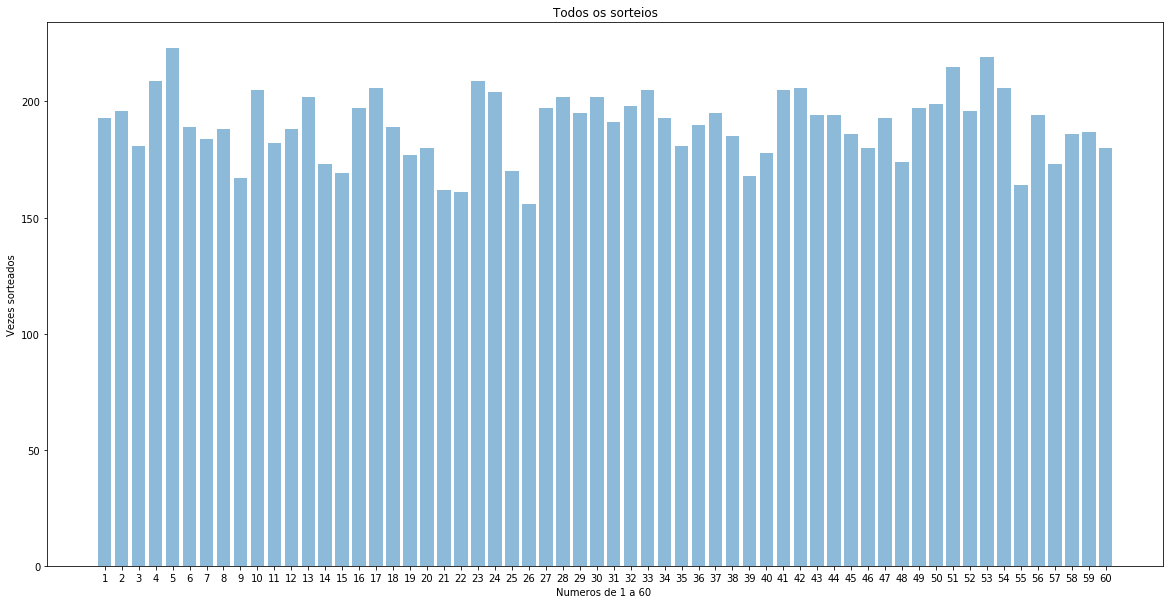

In [11]:
plot_histogram(data['total'], 'Todos os sorteios')

In [12]:
def get_data_as_matrix(): 
    matrix = []
    for line in normalized_data: 
        temp = split_data(line)
        numbers = temp[1].strip().split(' ')
        
        row = []
        for number in numbers: 
            row.append(int(number))
        
        matrix.append(row)
    
    return matrix

In [13]:
from sklearn.cluster import AffinityPropagation
from pandas import DataFrame

In [14]:
#X = DataFrame(get_data_as_matrix())
X = get_data_as_matrix()
len(X)

1898

In [15]:
#AffinityPropagation sem parâmetro algum configura o valor médio de proximidade entre as entradas.
af = AffinityPropagation().fit(X)

In [16]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

In [17]:
print('Número estimado de clusters: %d' % n_clusters_)

Número estimado de clusters: 76


In [18]:
def create_cluster_fingerprint_array(labels): 
    temp = {}
    for label in labels: 
        temp[label] = []
    
    return temp

cluster_fingerprint = create_cluster_fingerprint_array(labels)

In [19]:
# Cria impressão digital do cluster ao juntar
# todos os elementos que pertencem no mesmo.
for item in X: 
    cluster_predicted = af.predict([item])
    cluster_fingerprint[cluster_predicted[0]].append(" ".join(map(str,item)))

In [20]:
# Os primeiros 10 jogos do cluster 80. 
#Nota-se a similaridade. 
cluster_fingerprint[50][:10]

['4 13 23 29 46 47',
 '2 14 20 25 41 45',
 '2 12 26 31 43 46',
 '5 8 19 26 48 57',
 '8 9 22 25 41 44',
 '8 10 24 33 45 48',
 '6 14 26 28 42 45',
 '8 14 19 30 42 50',
 '1 9 19 25 50 52',
 '7 8 18 25 47 48']

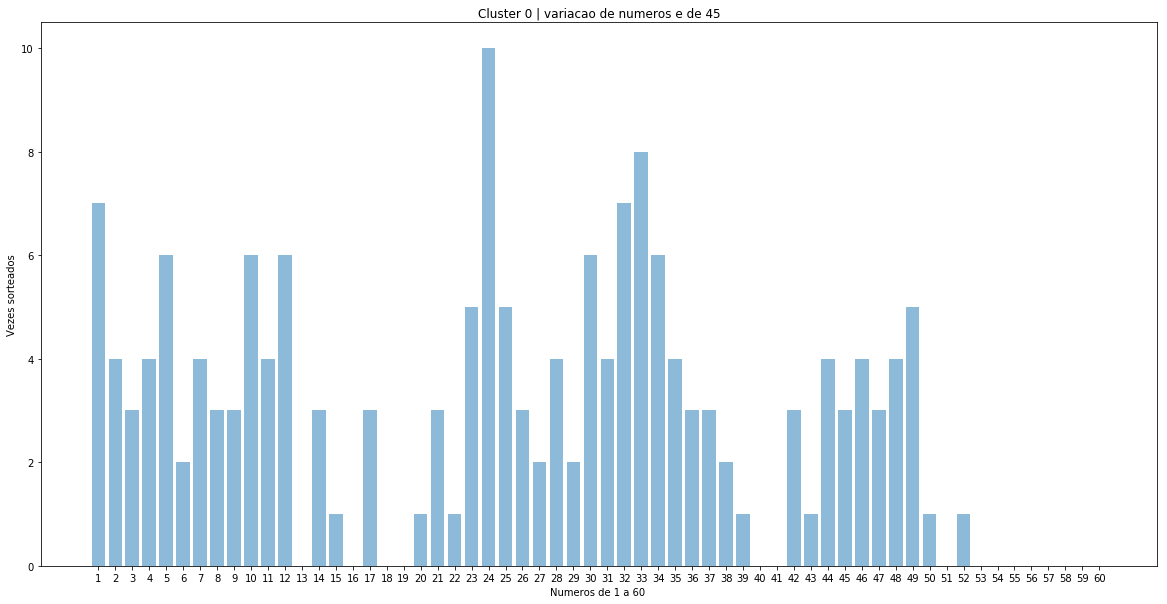

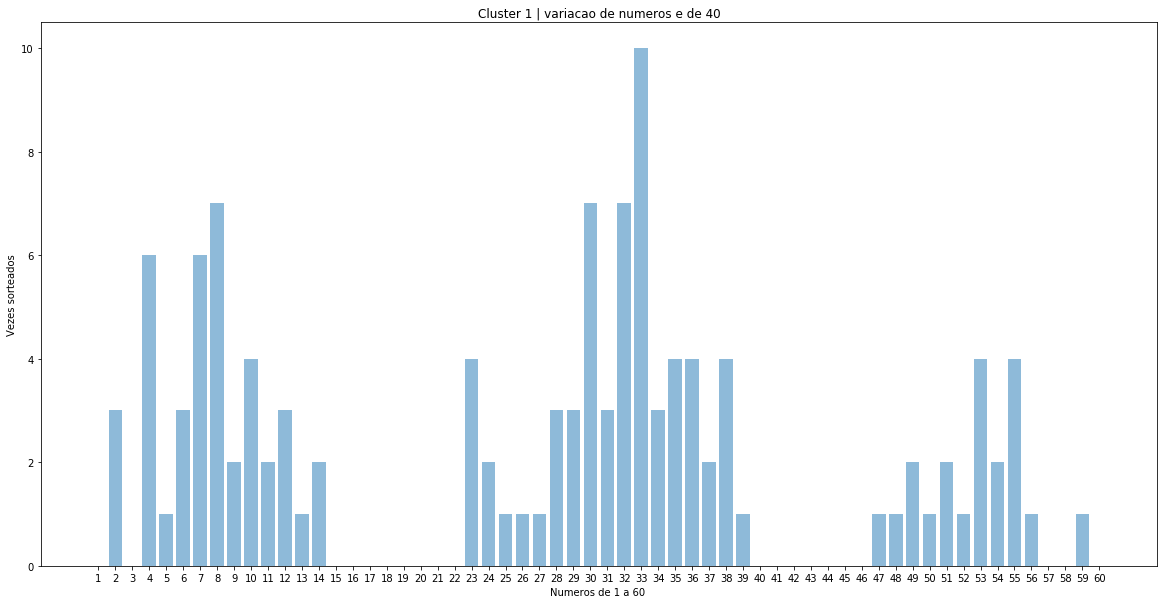

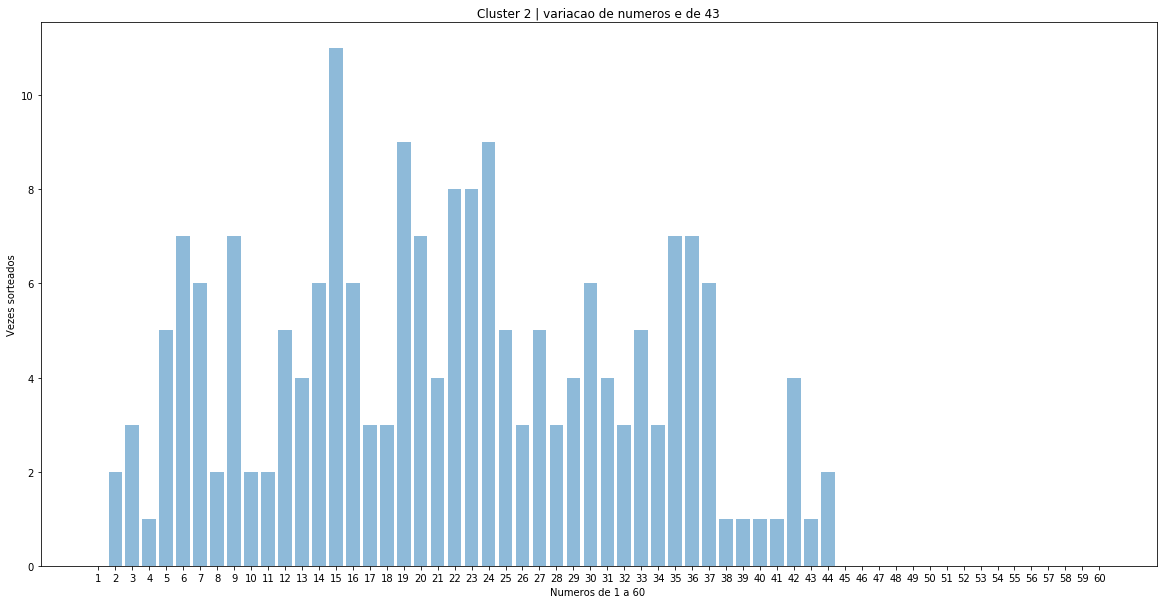

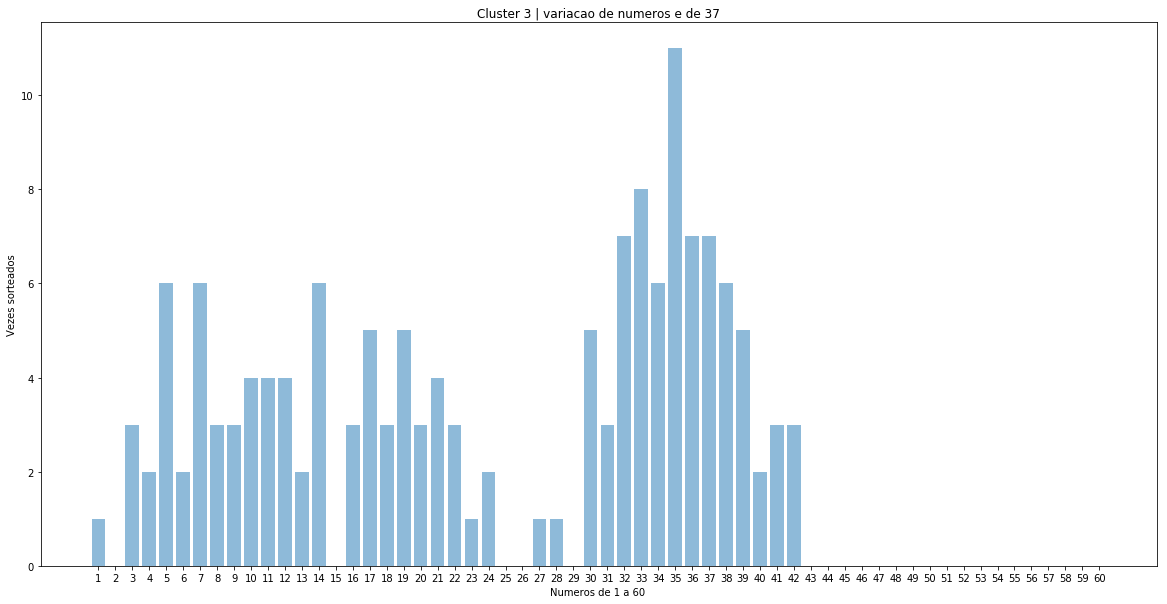

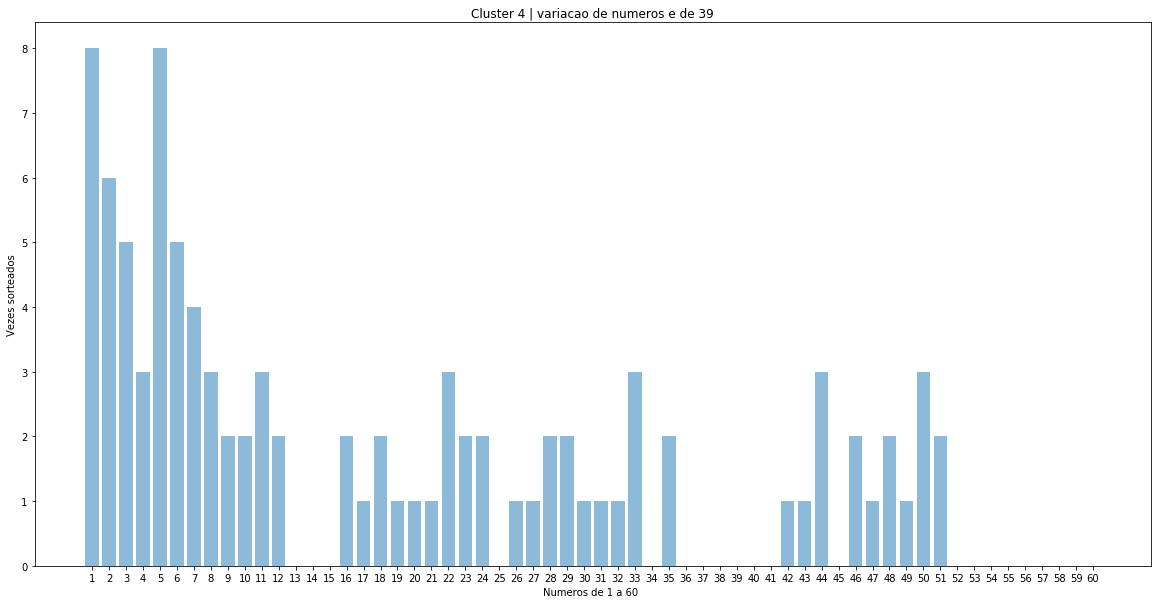

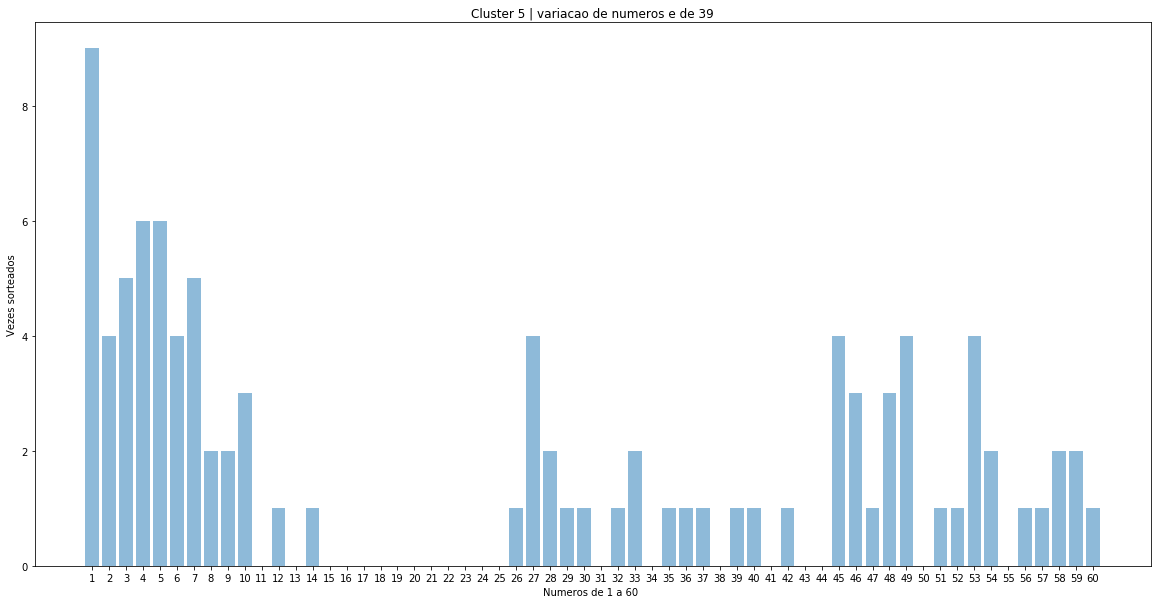

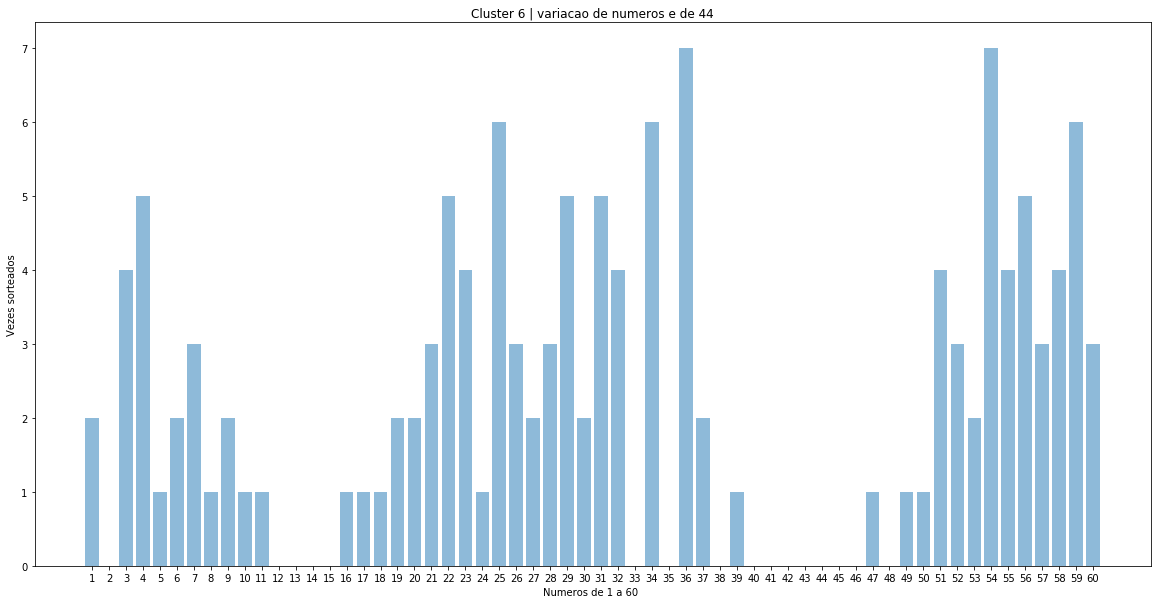

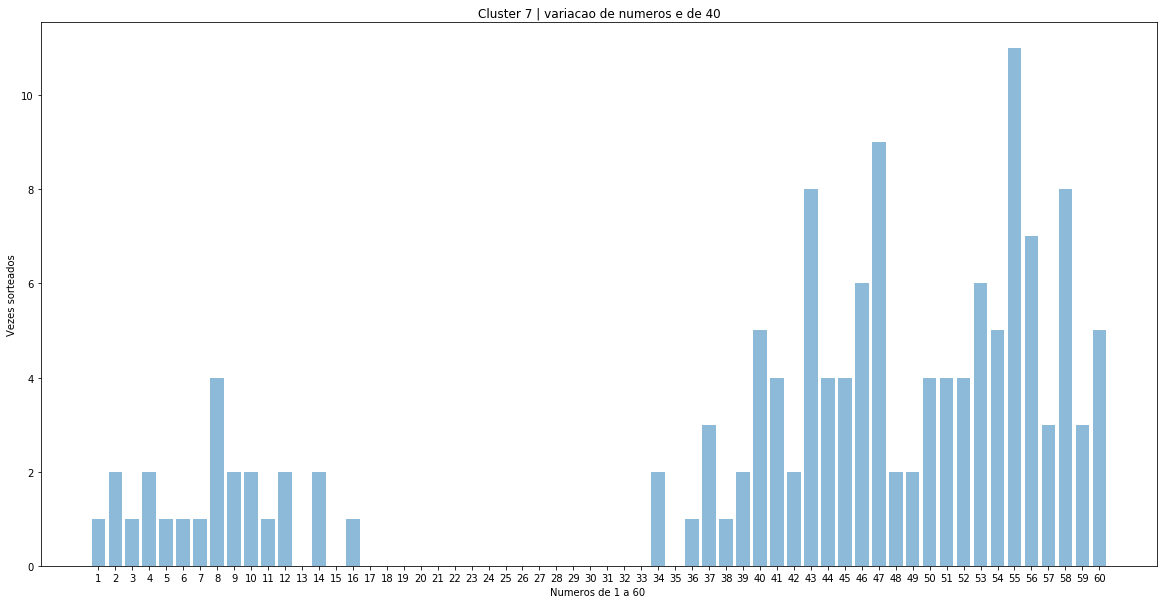

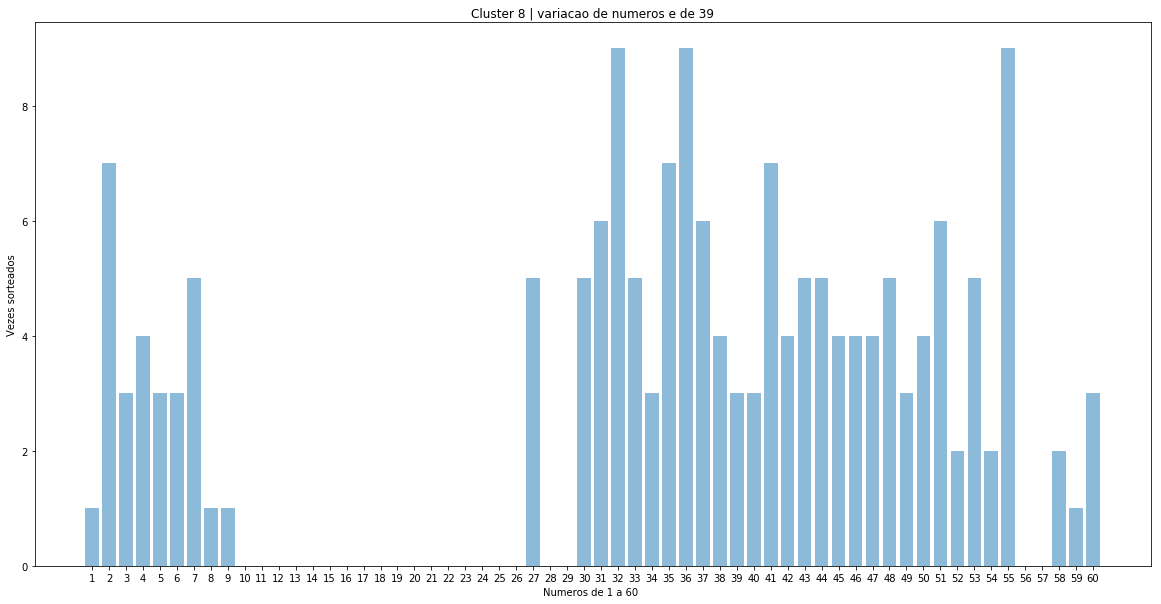

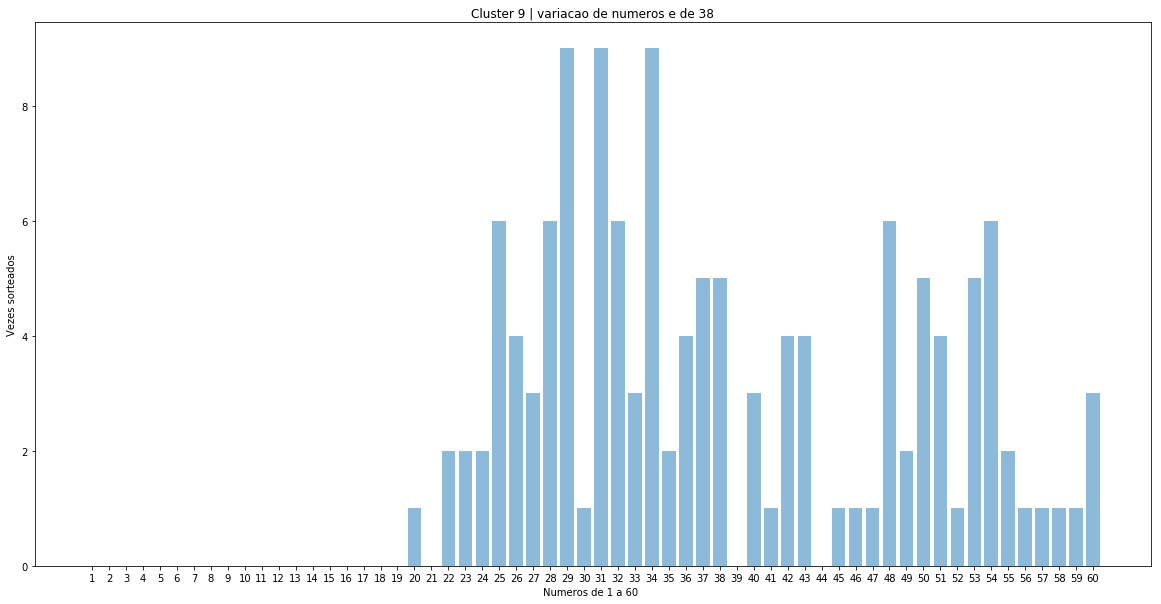

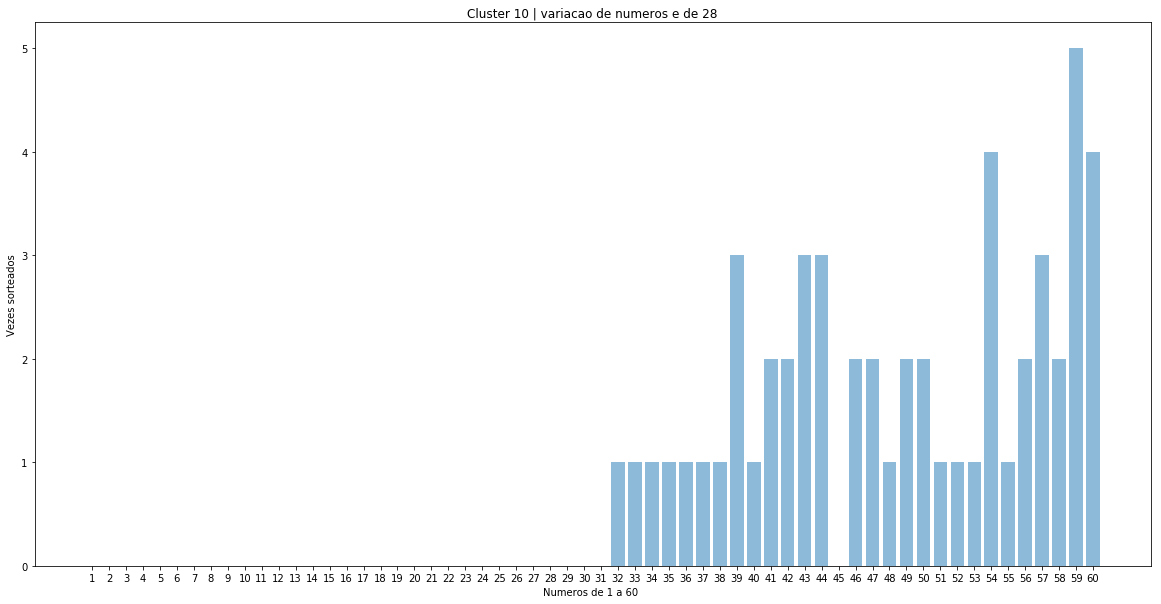

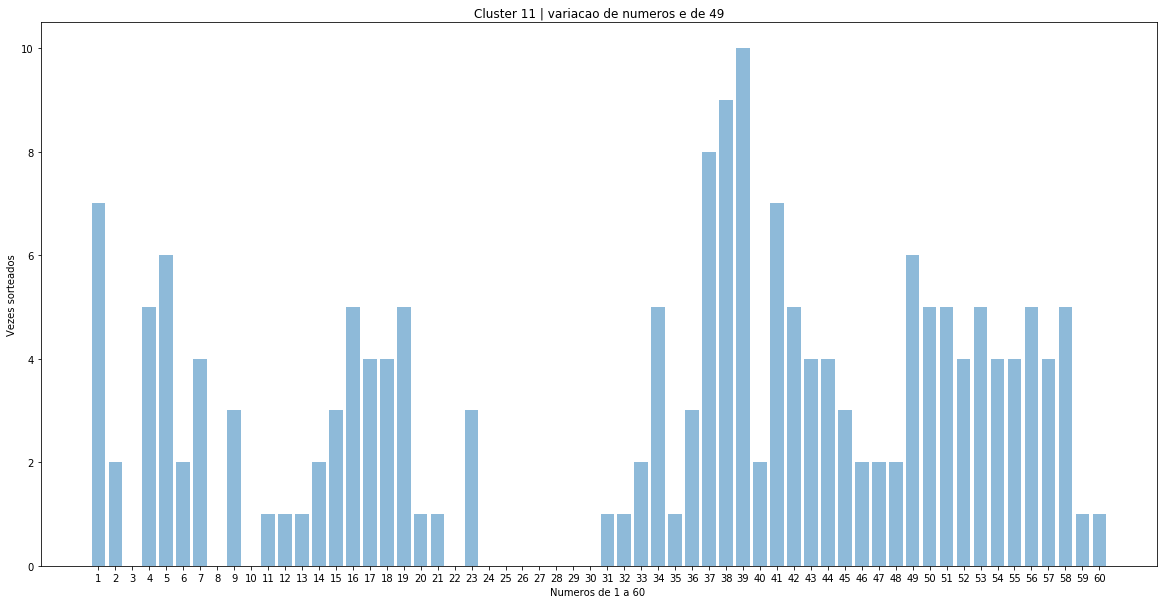

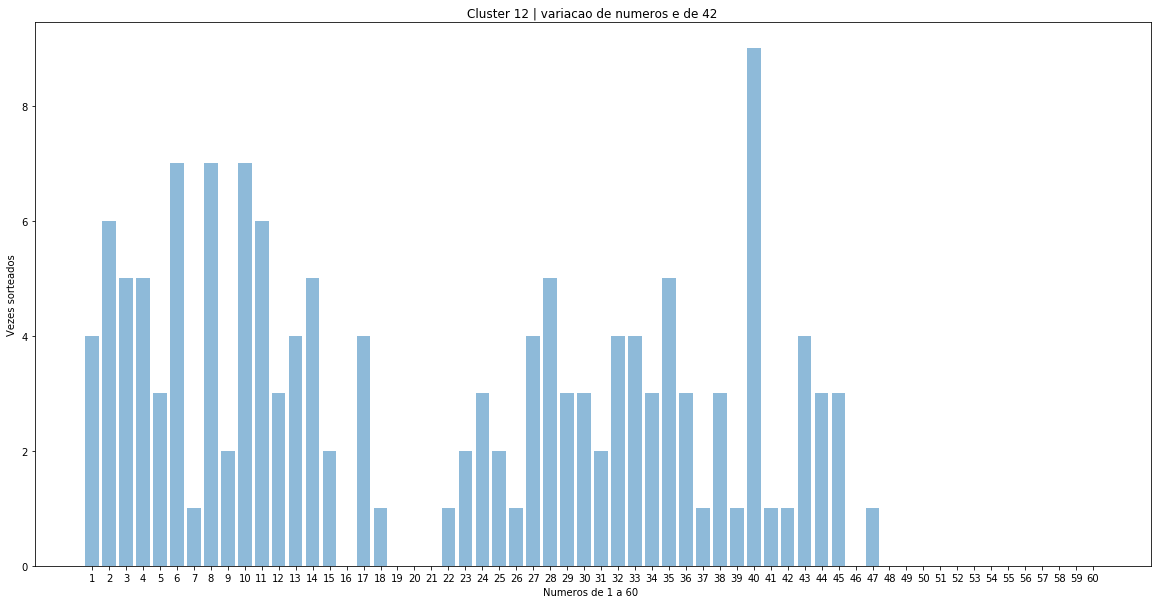

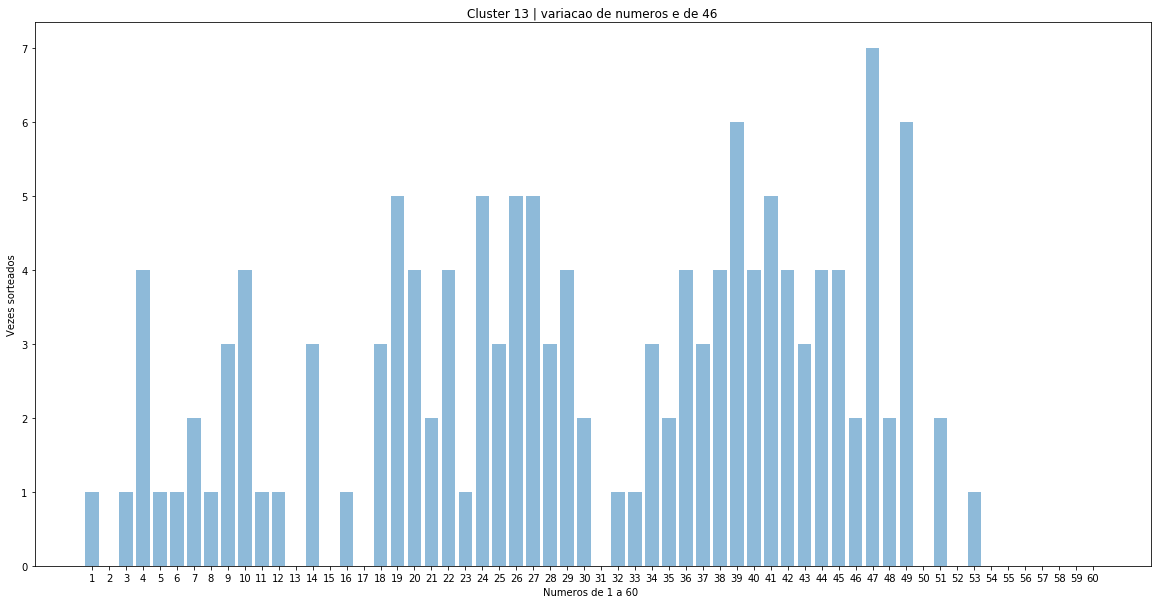

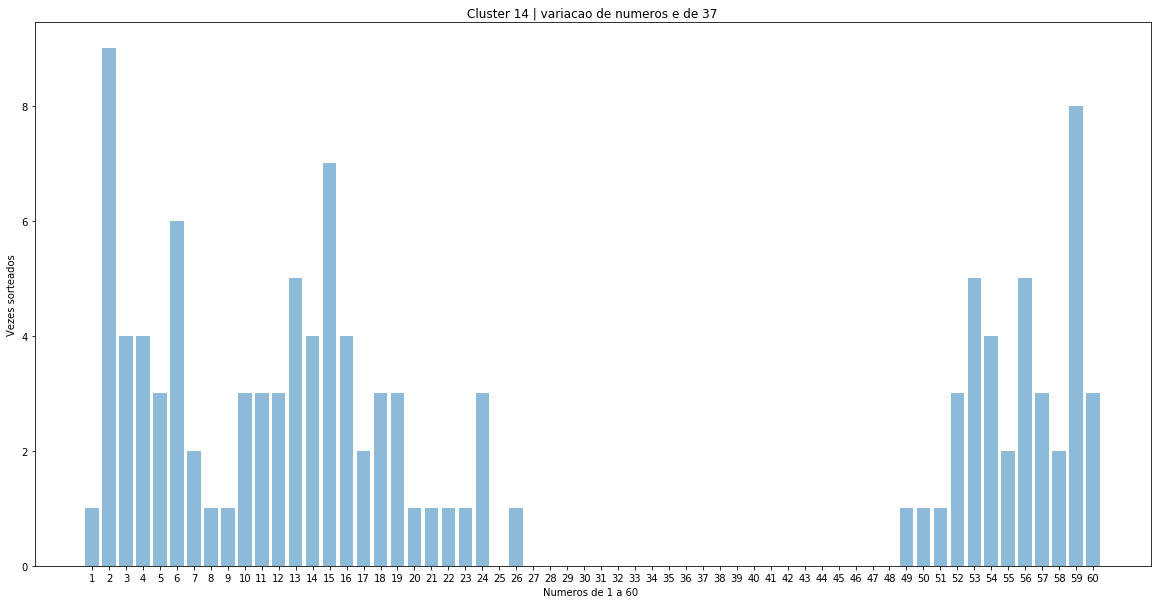

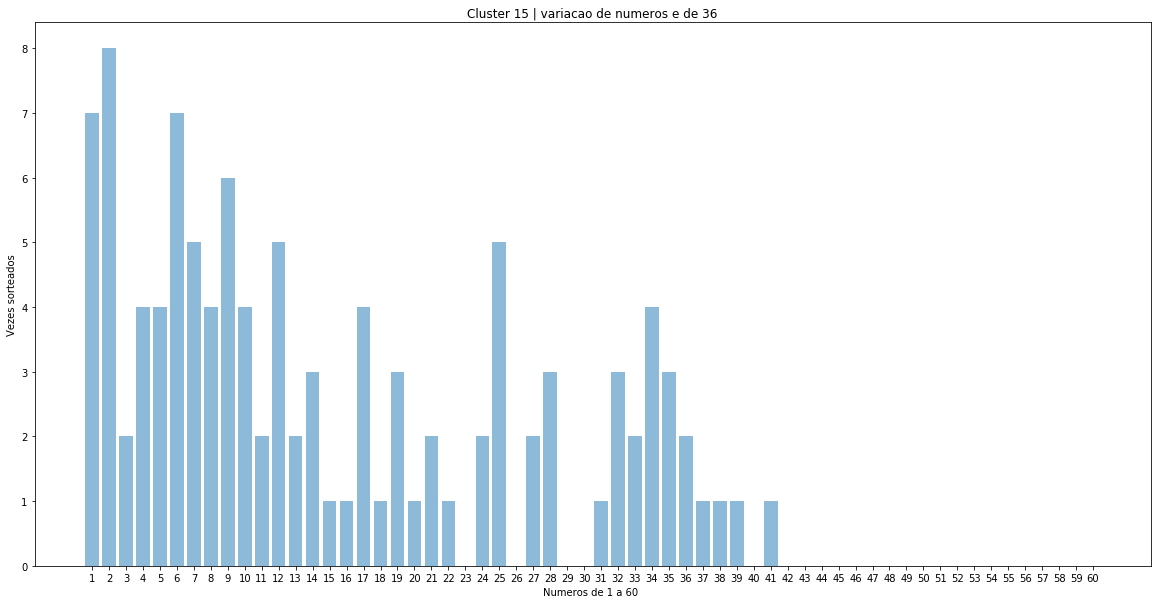

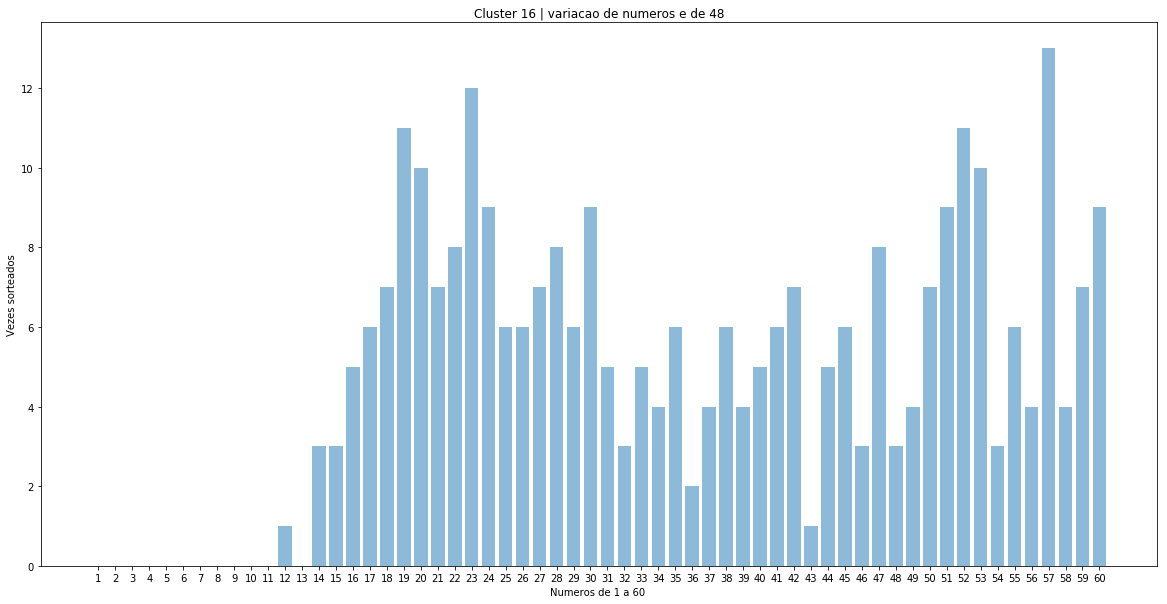

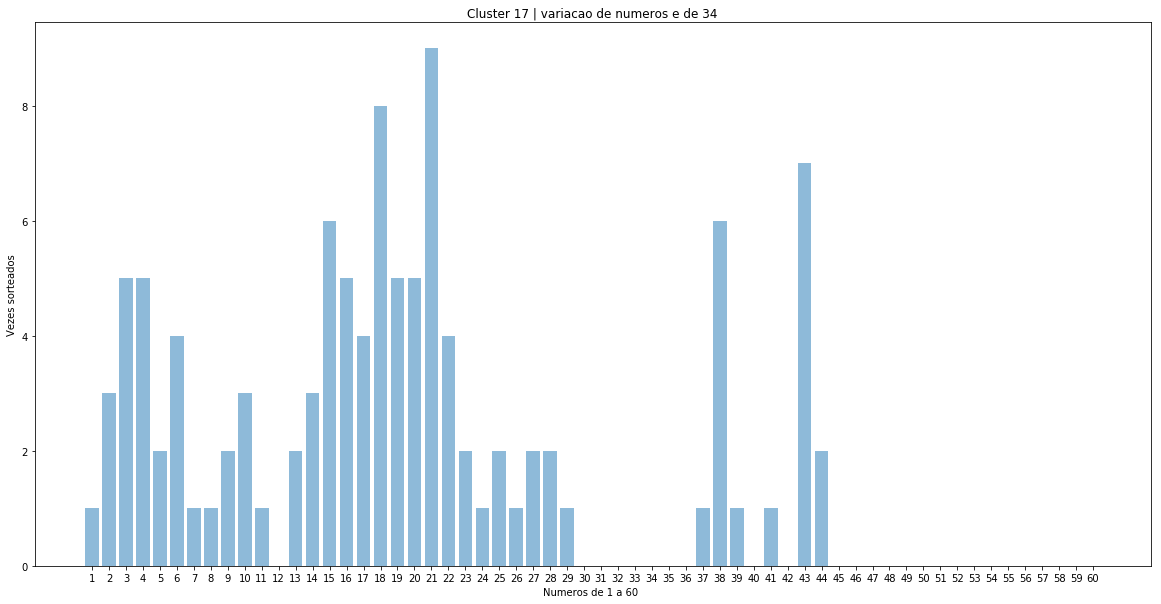

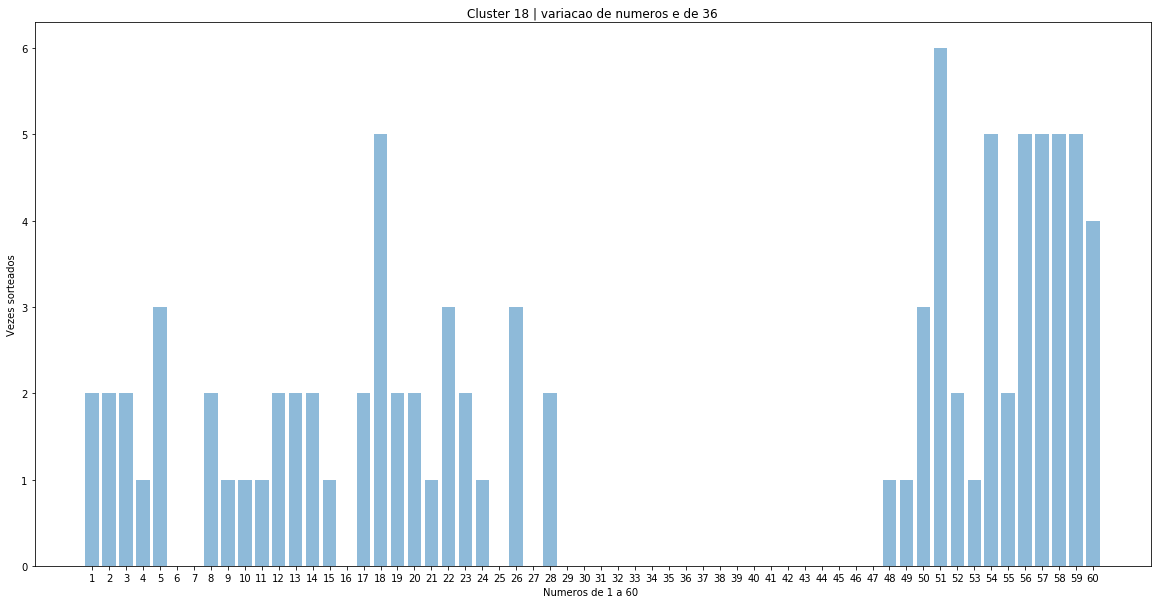

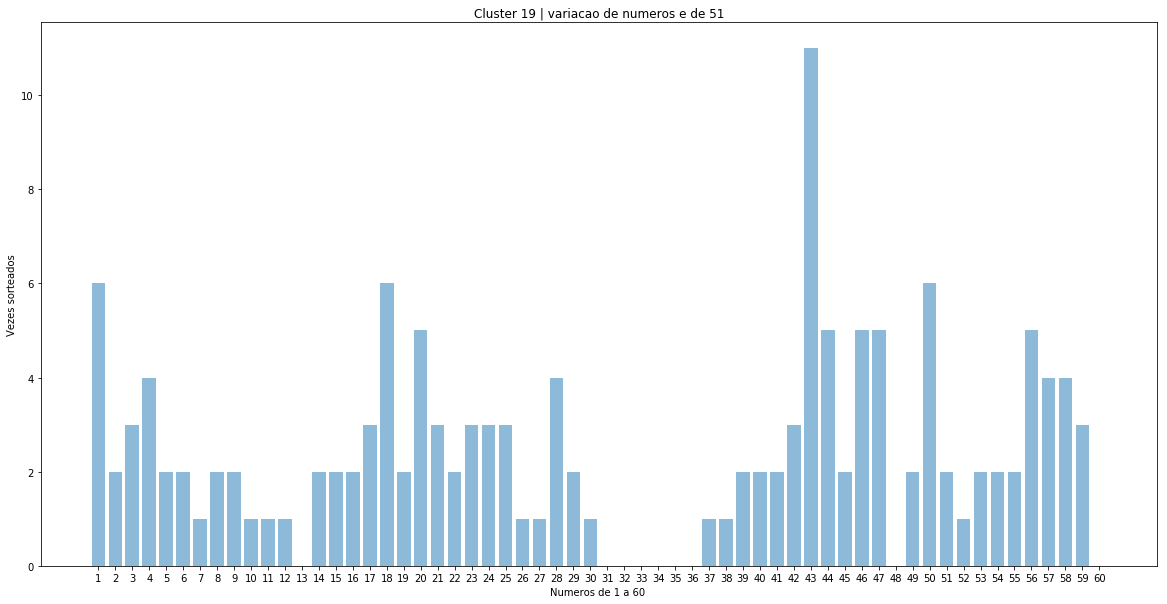

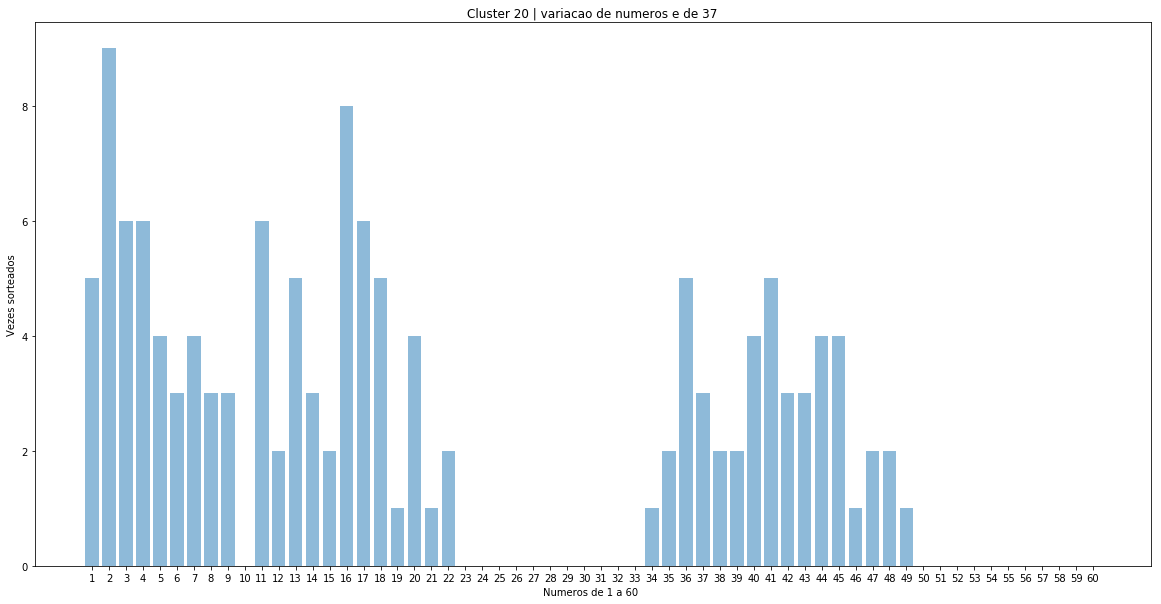

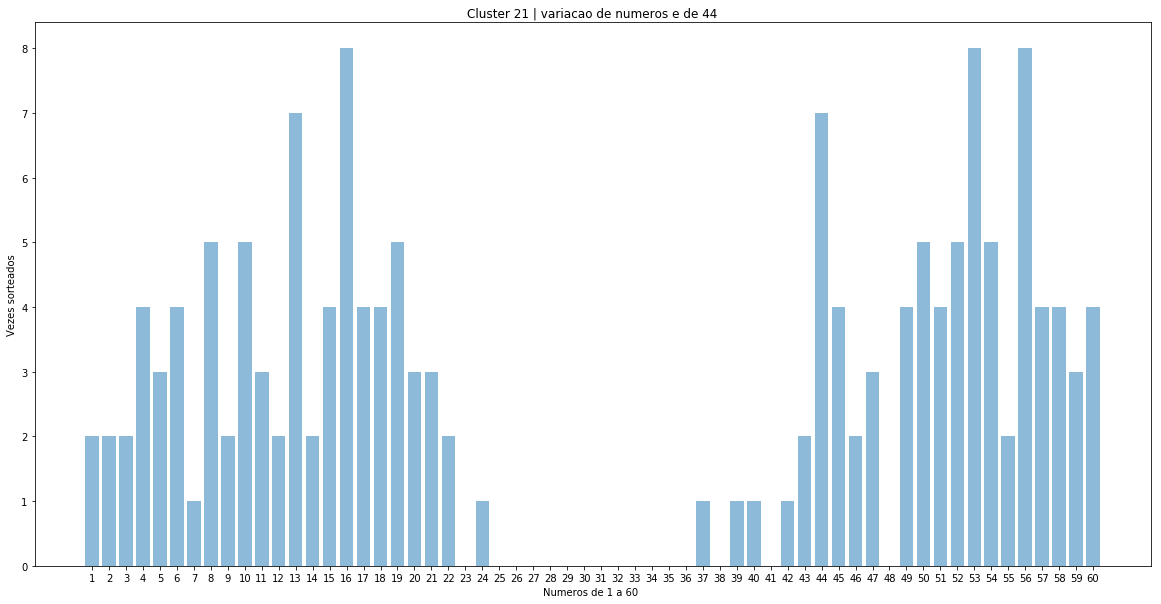

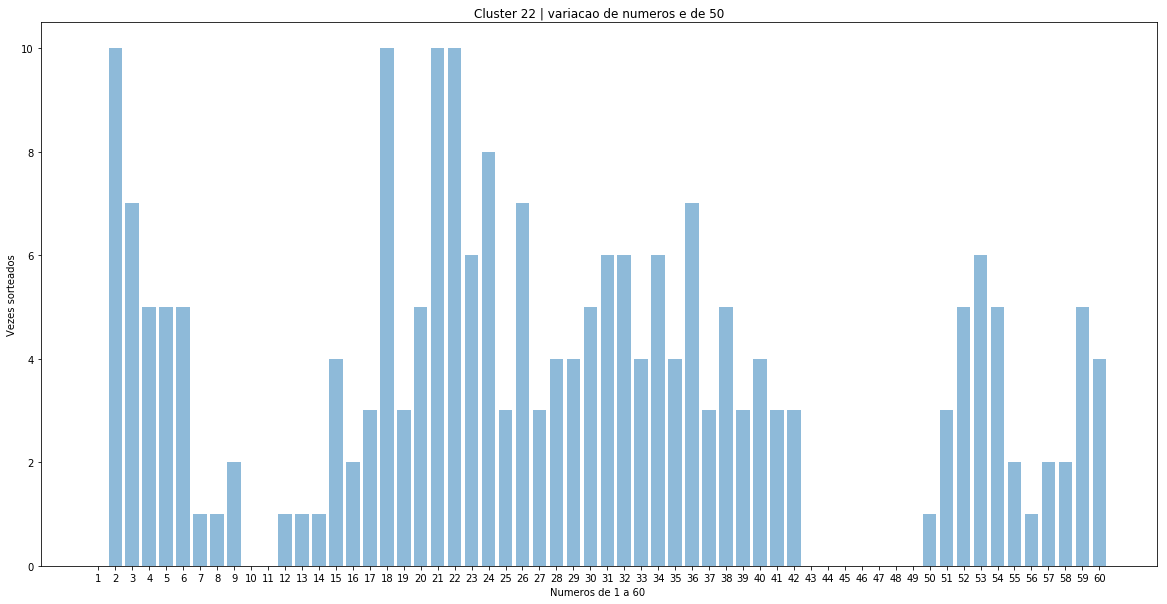

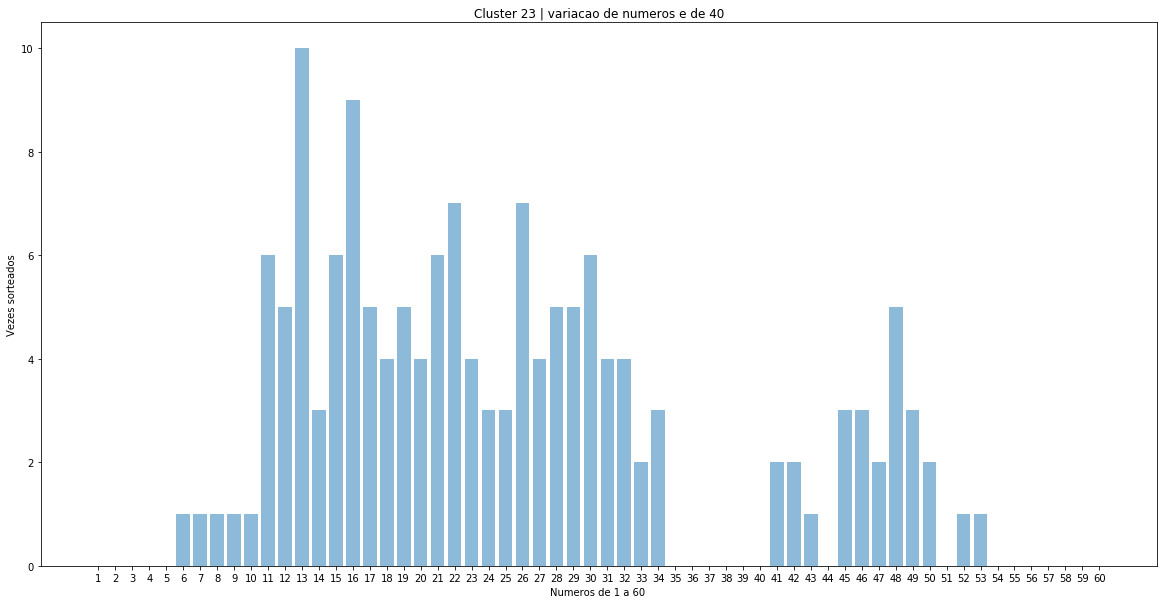

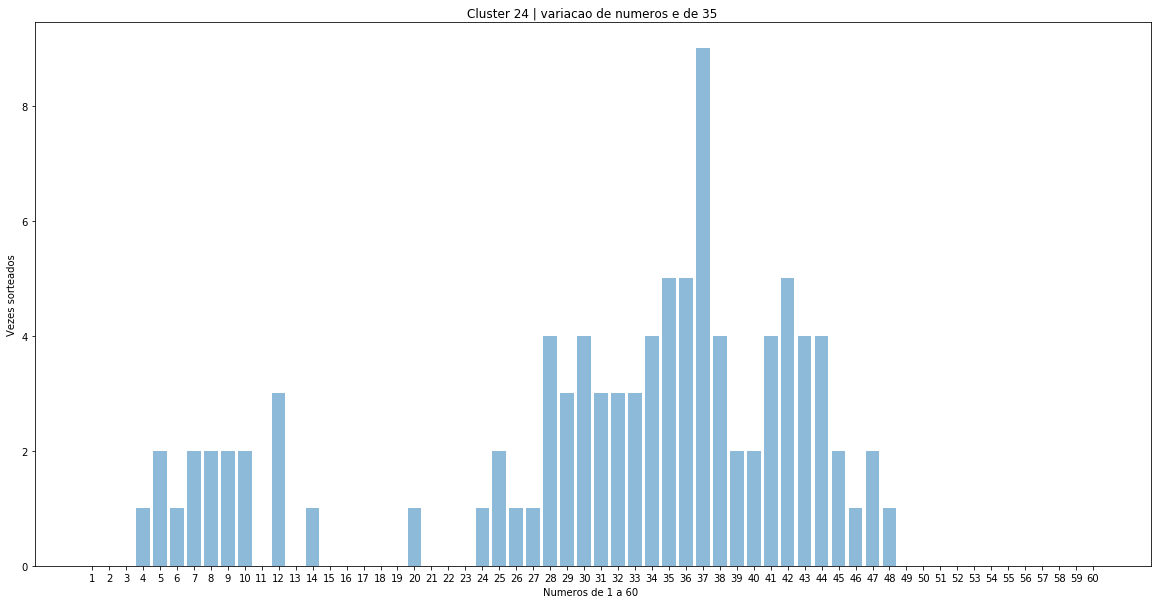

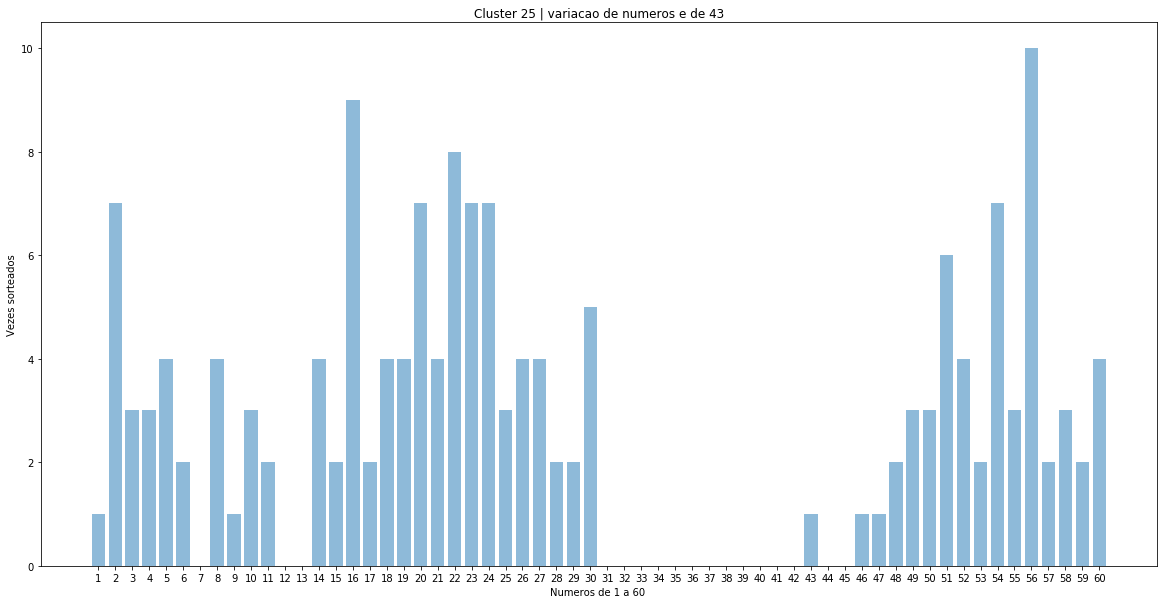

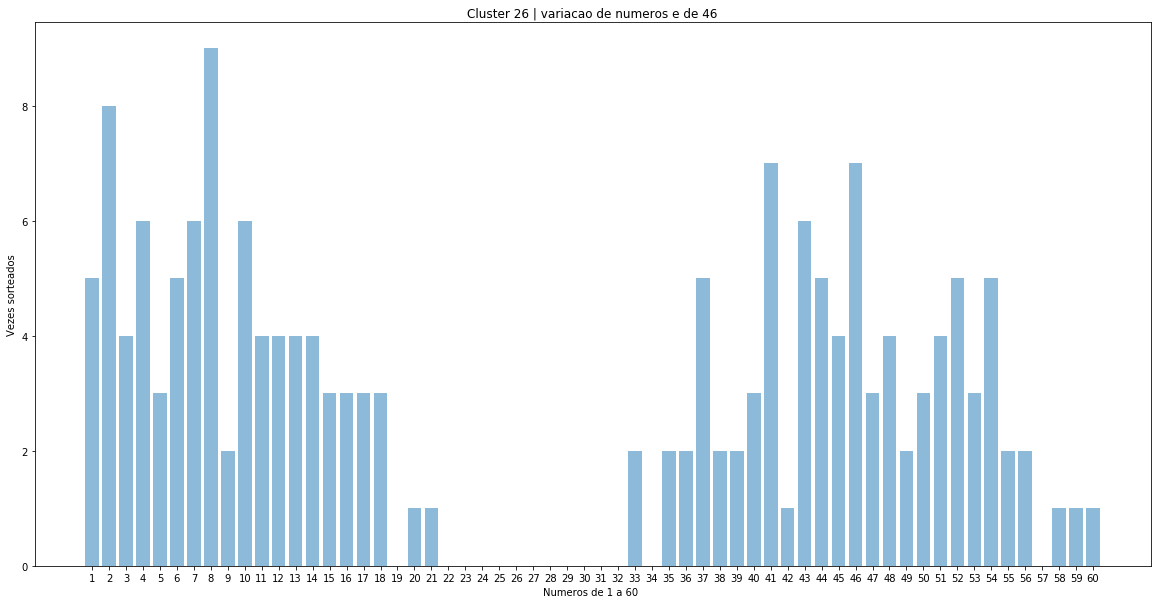

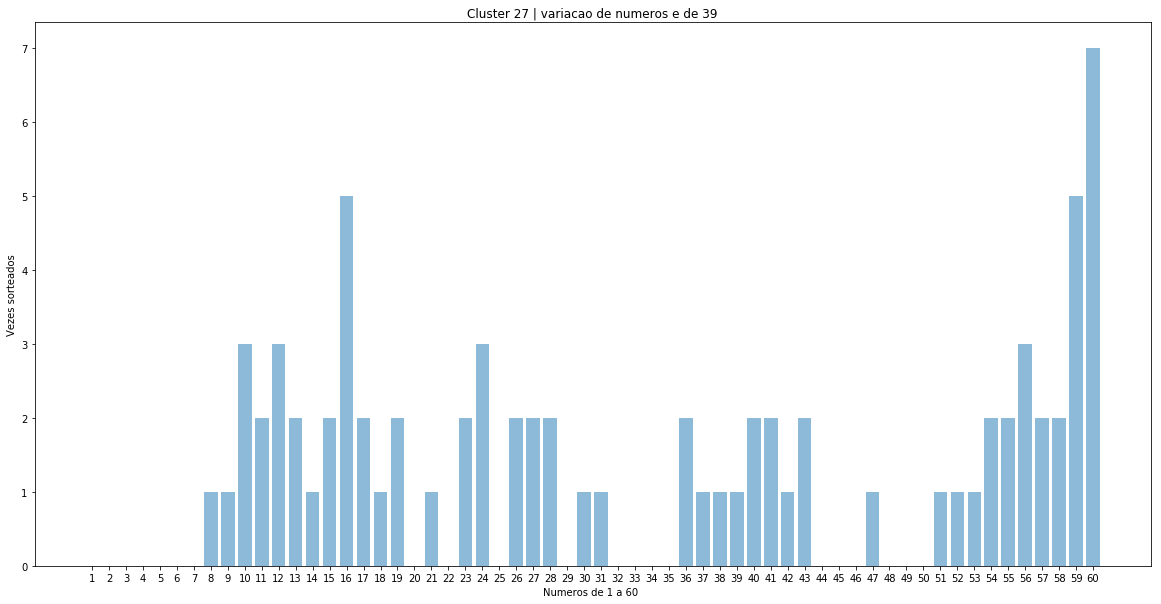

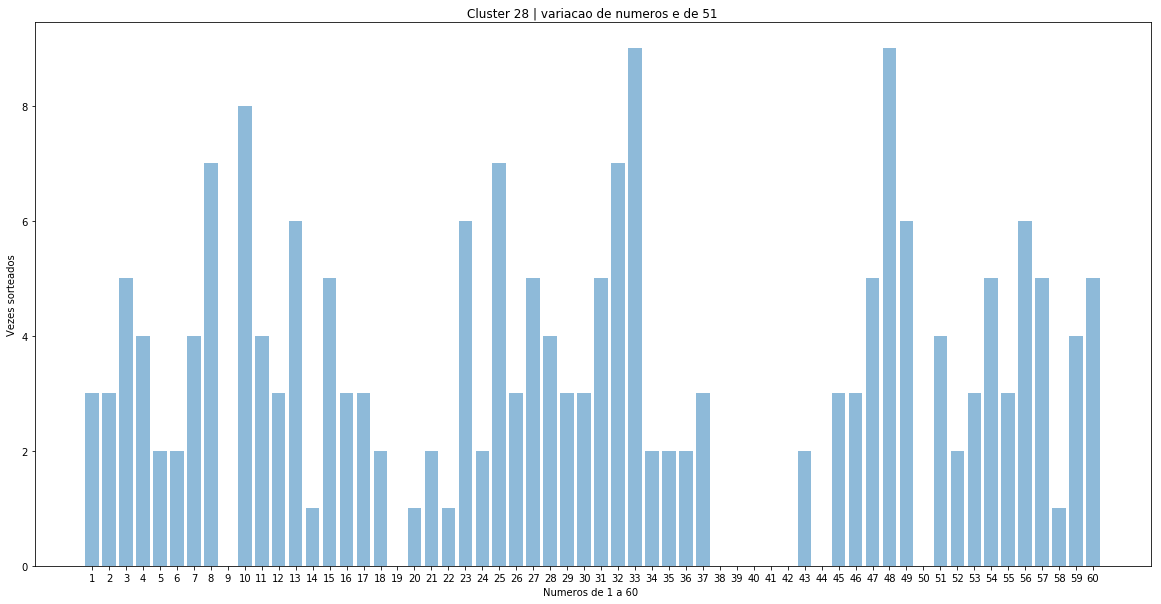

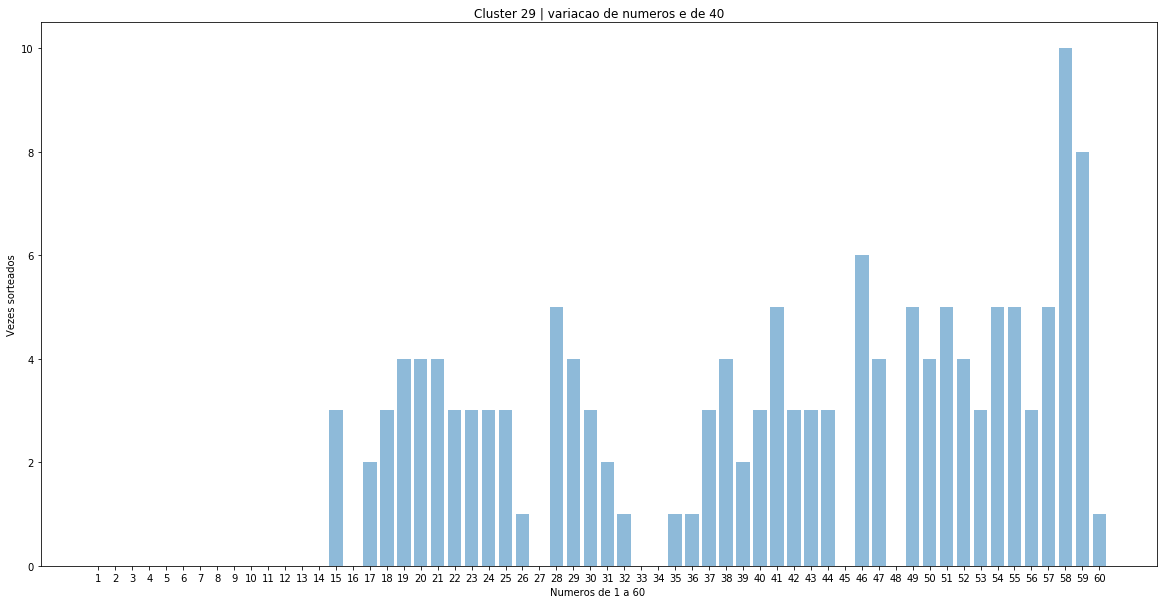

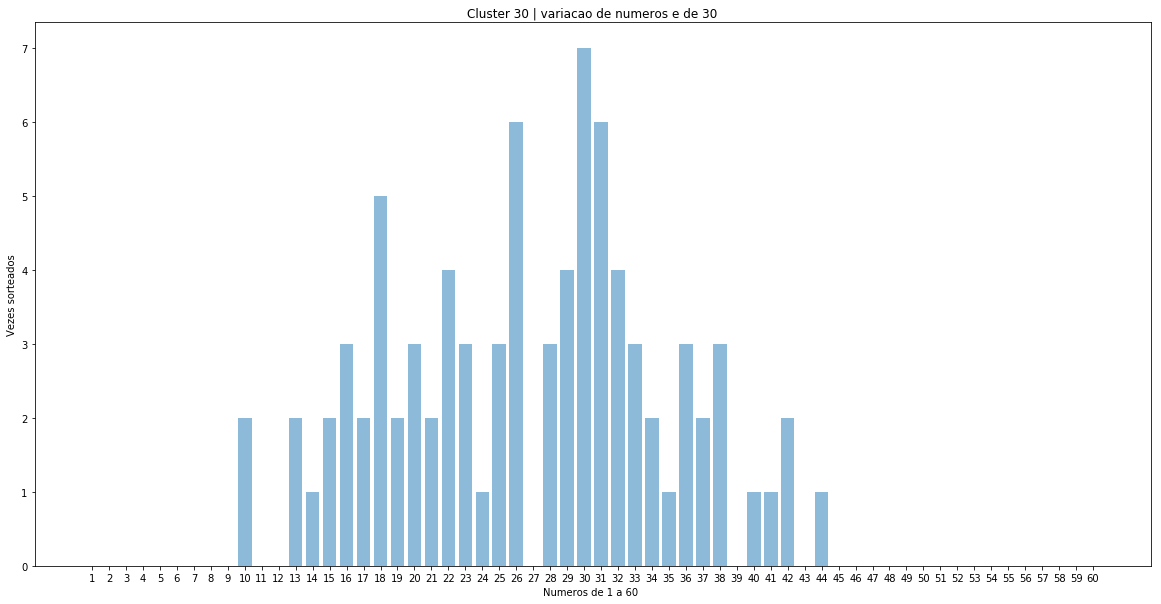

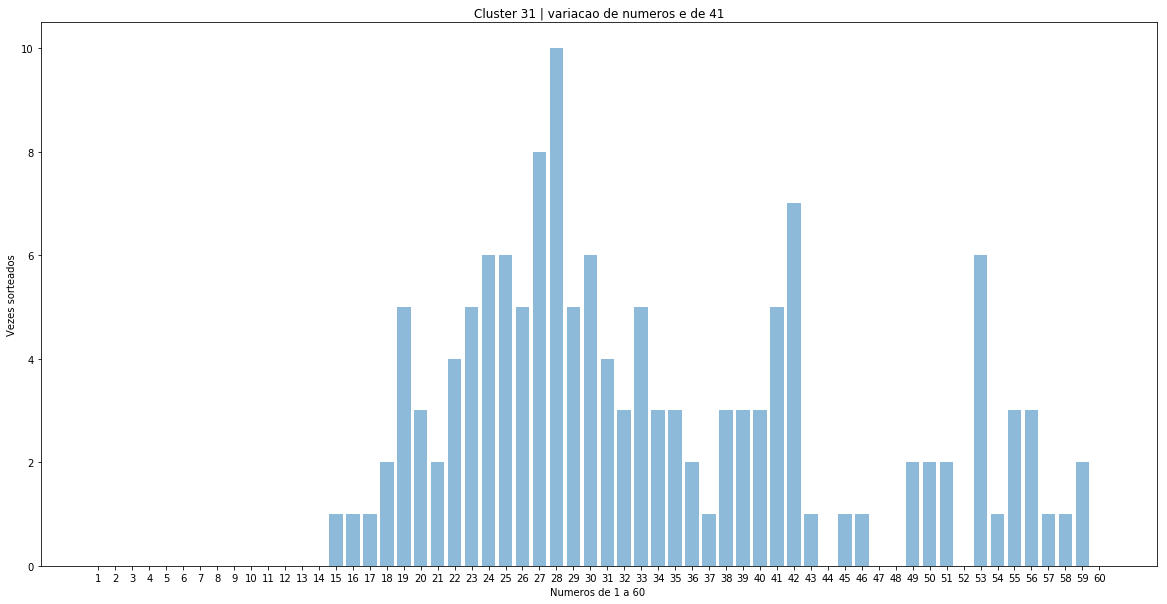

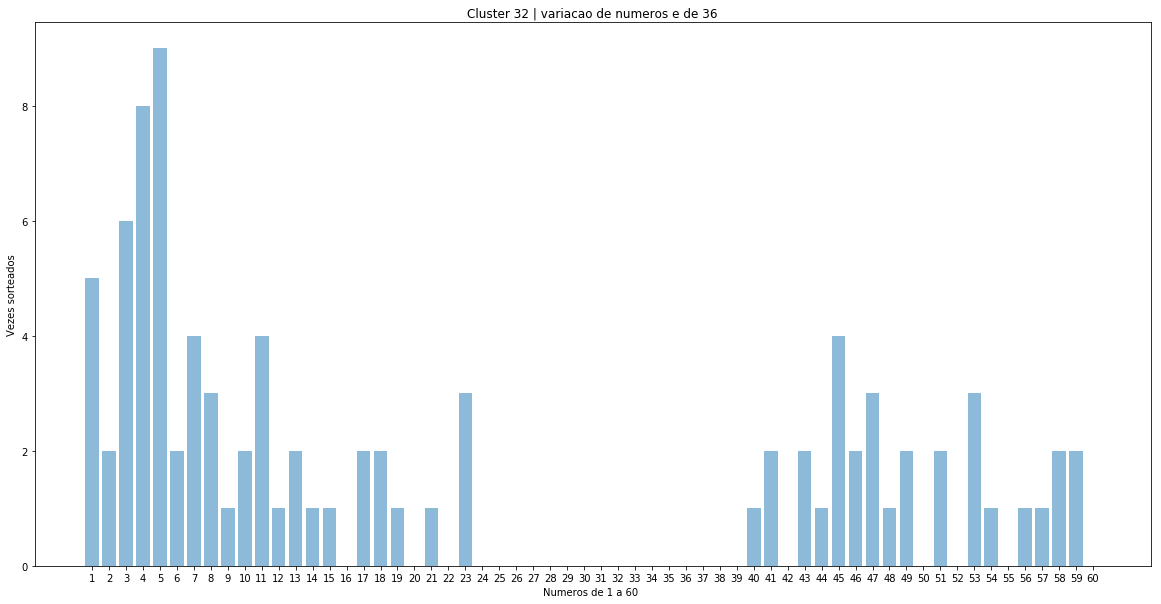

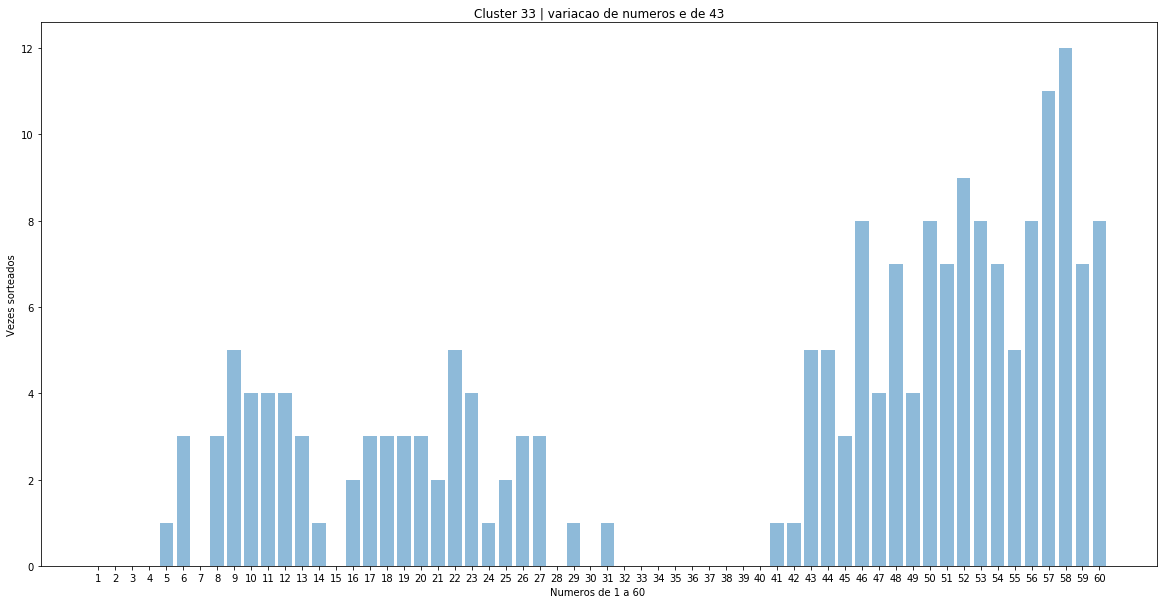

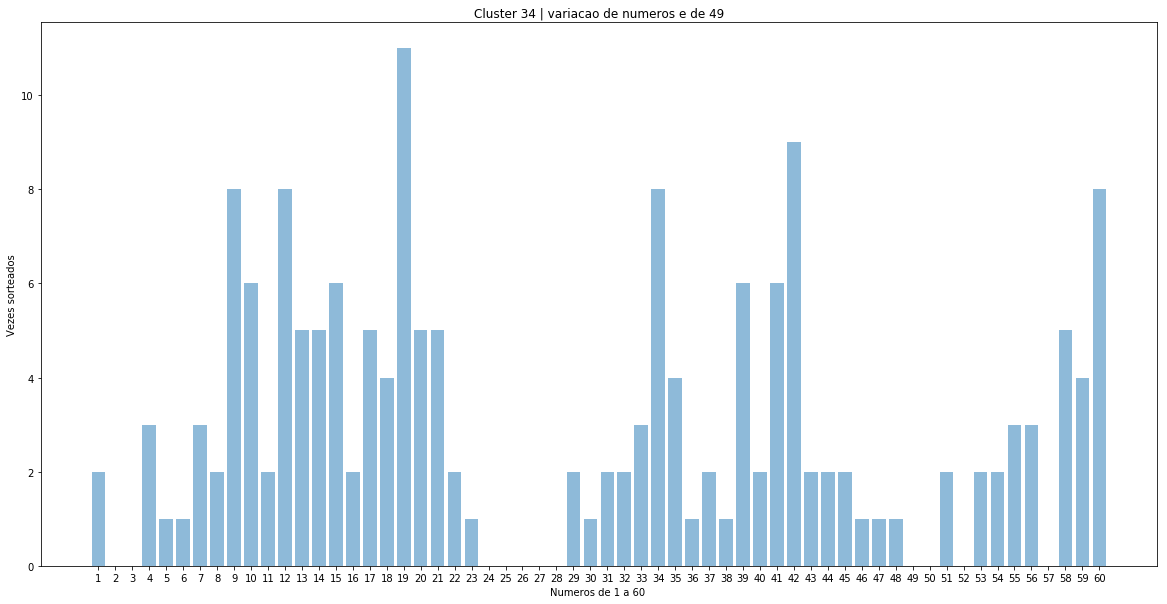

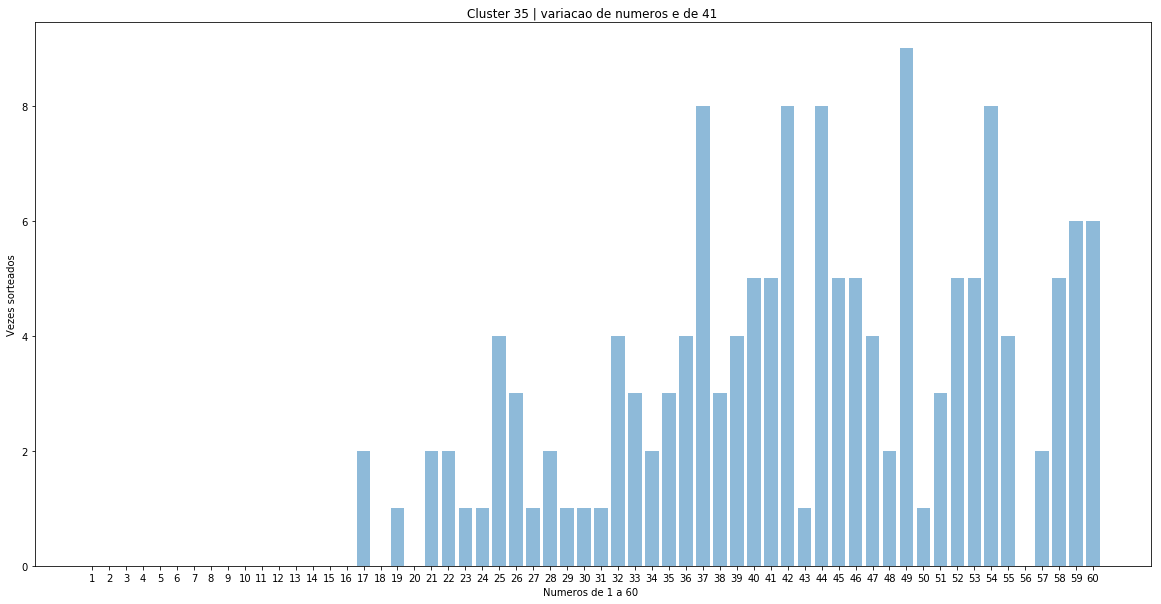

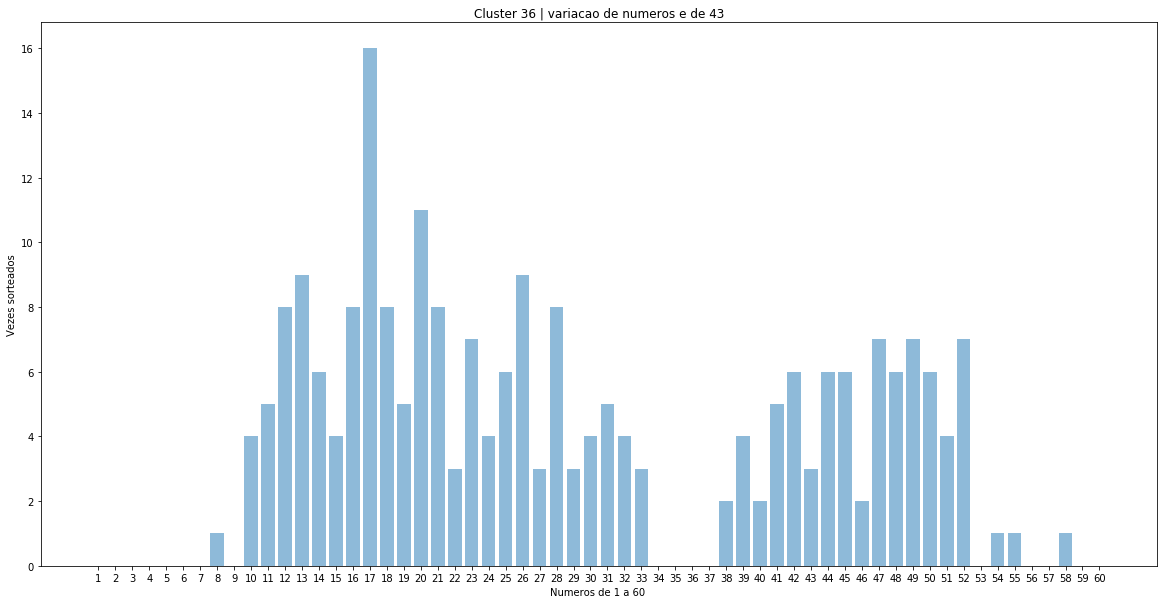

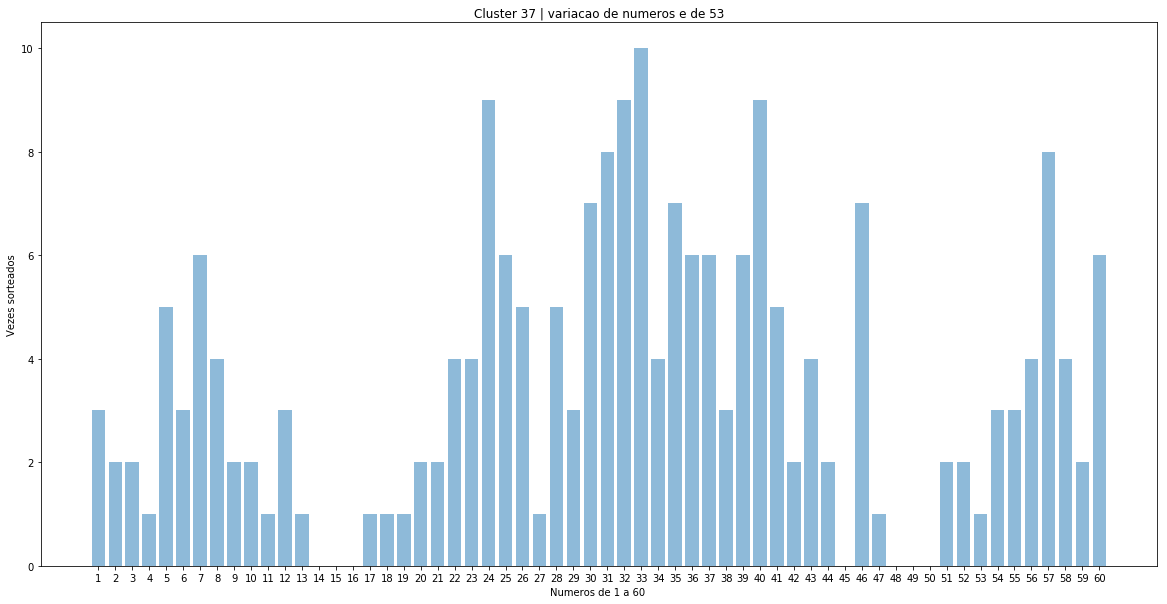

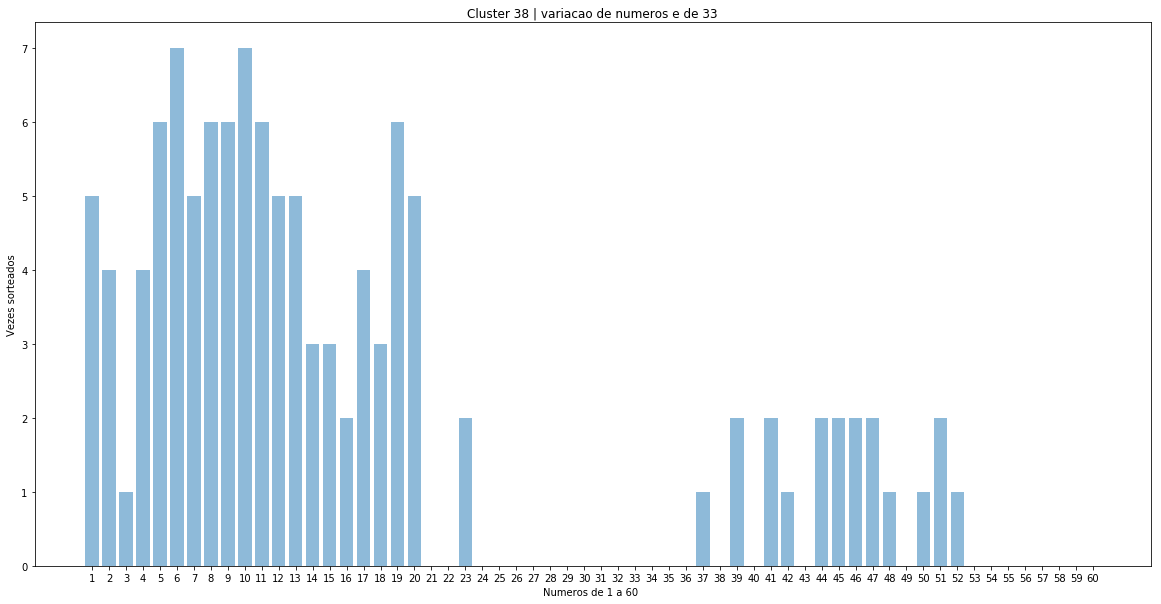

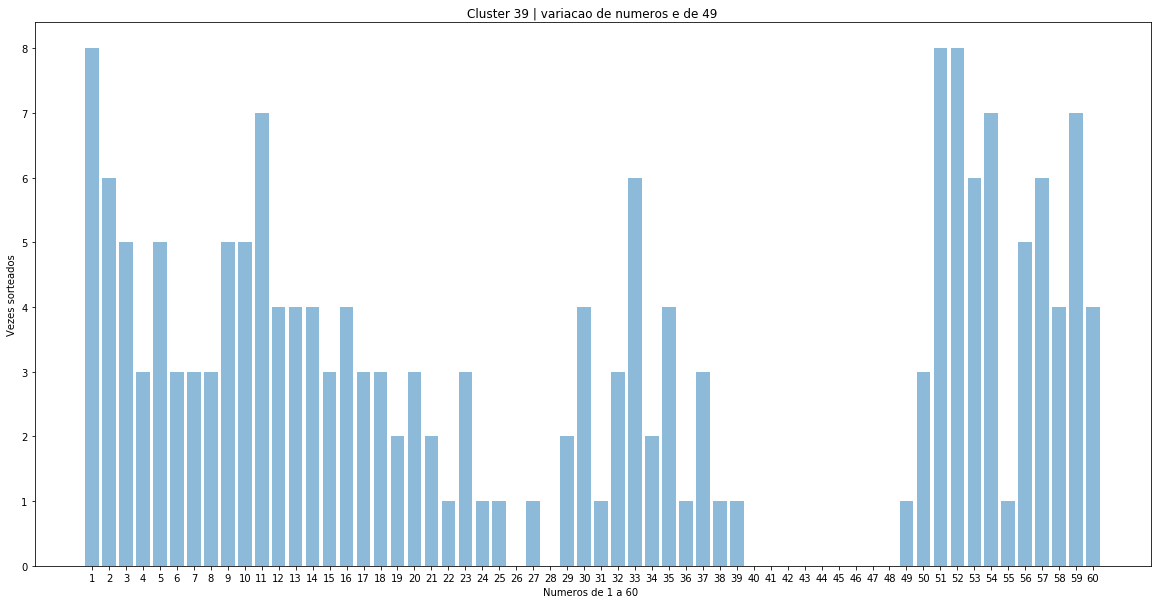

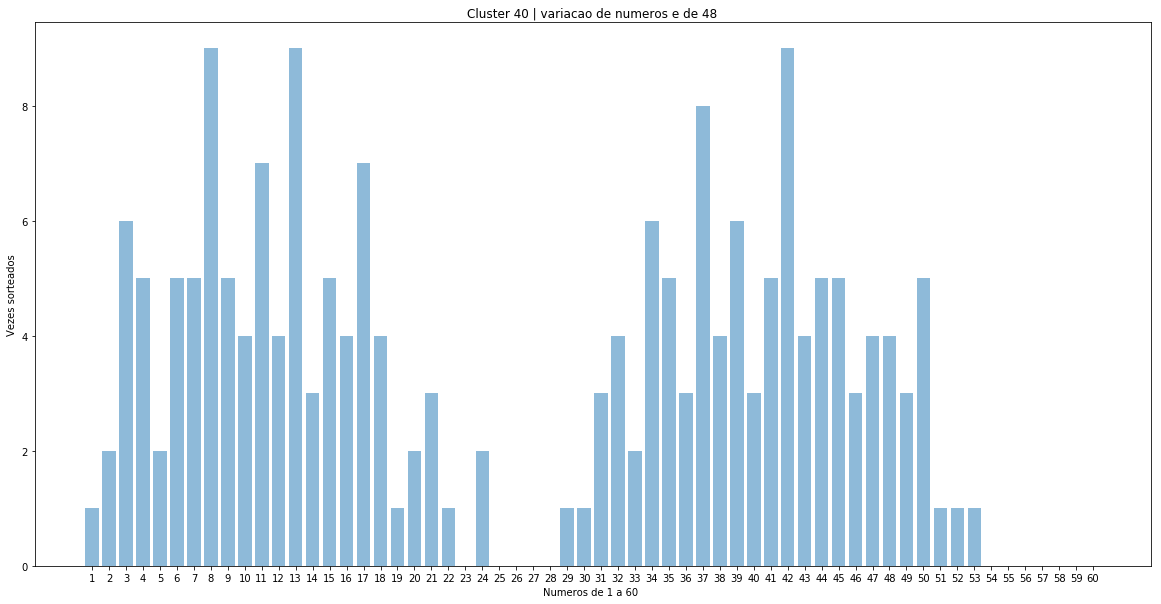

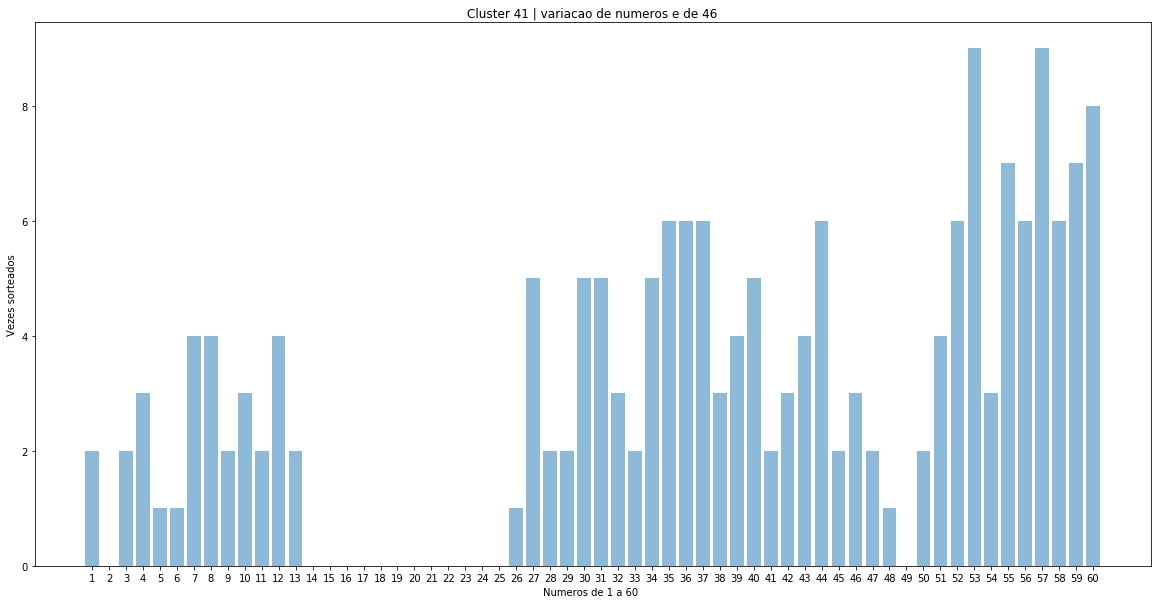

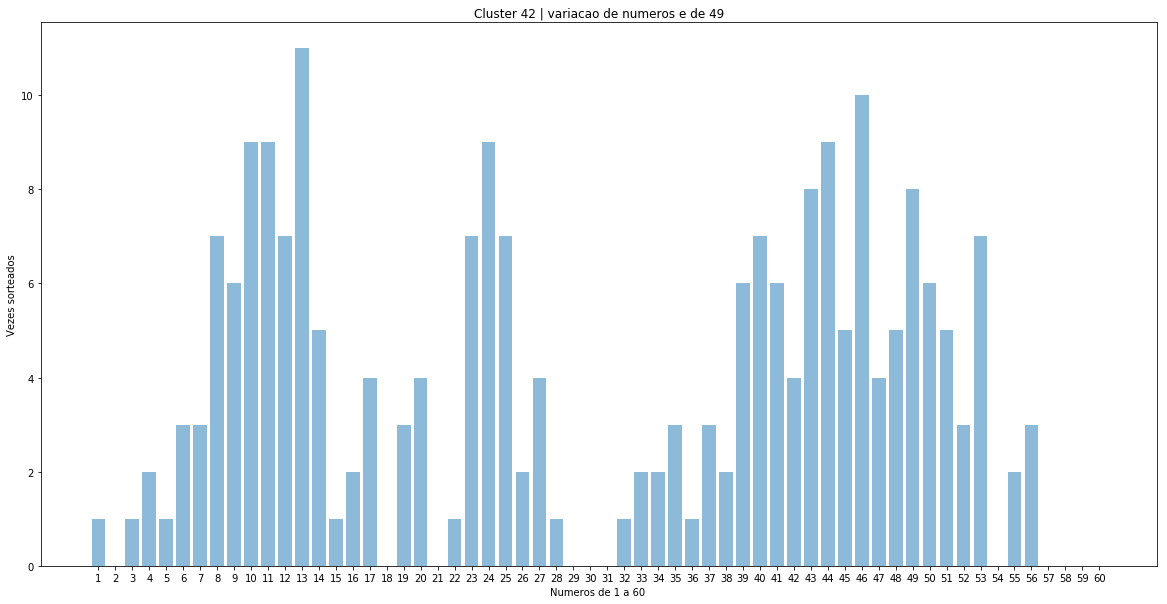

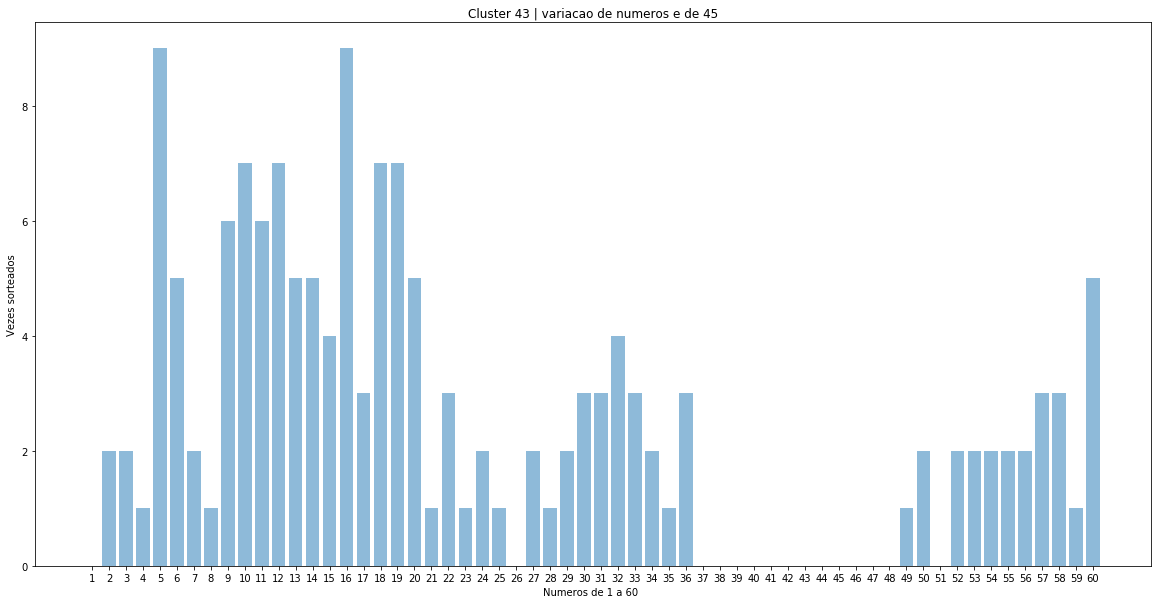

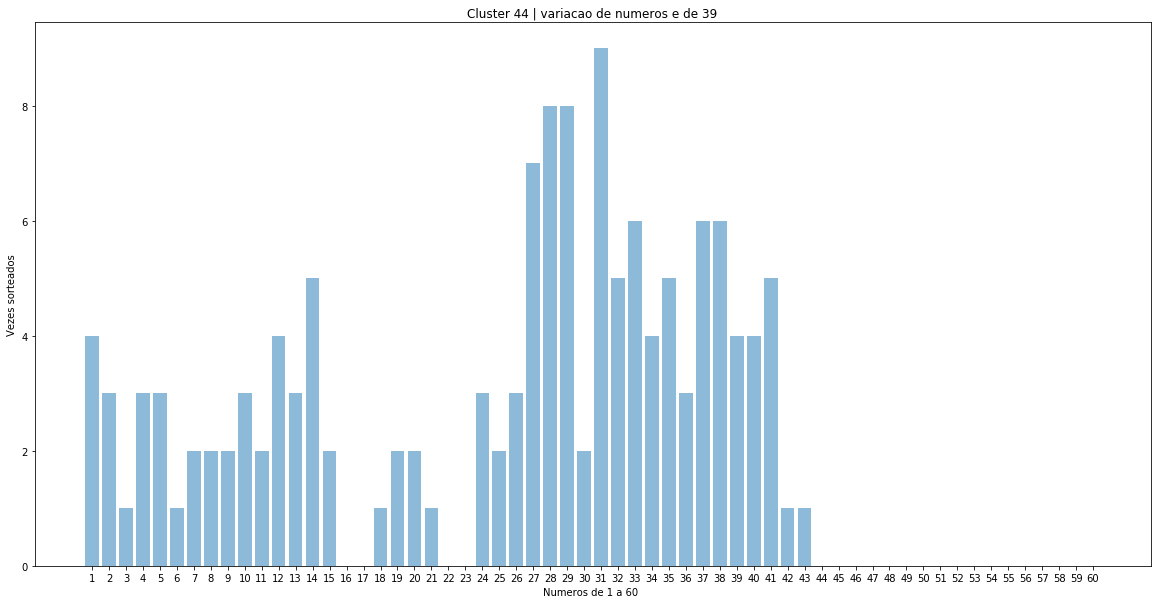

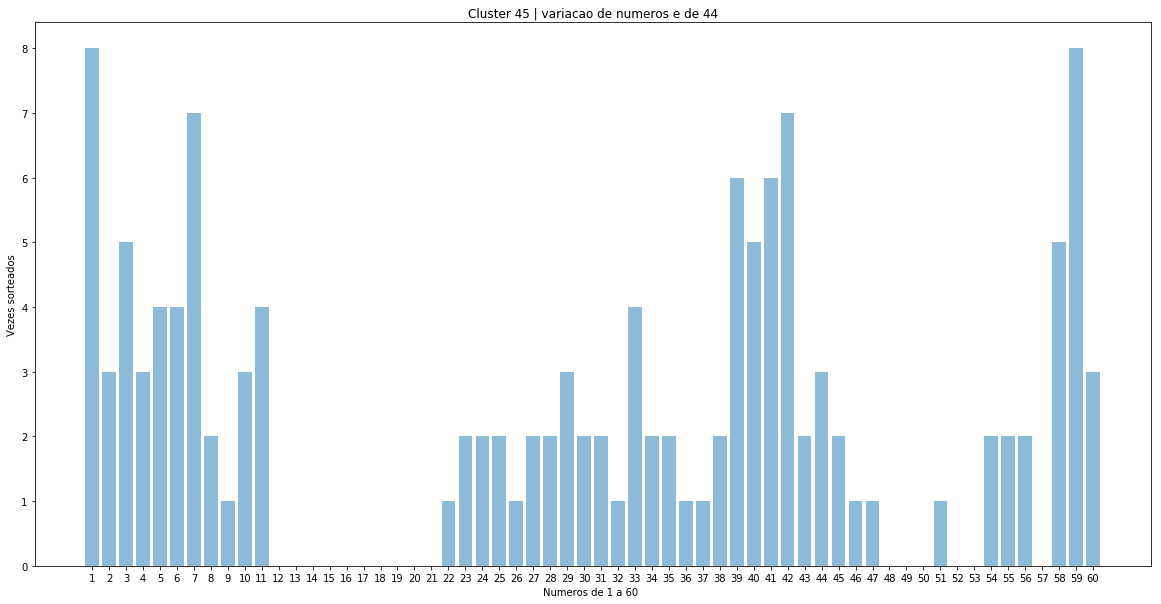

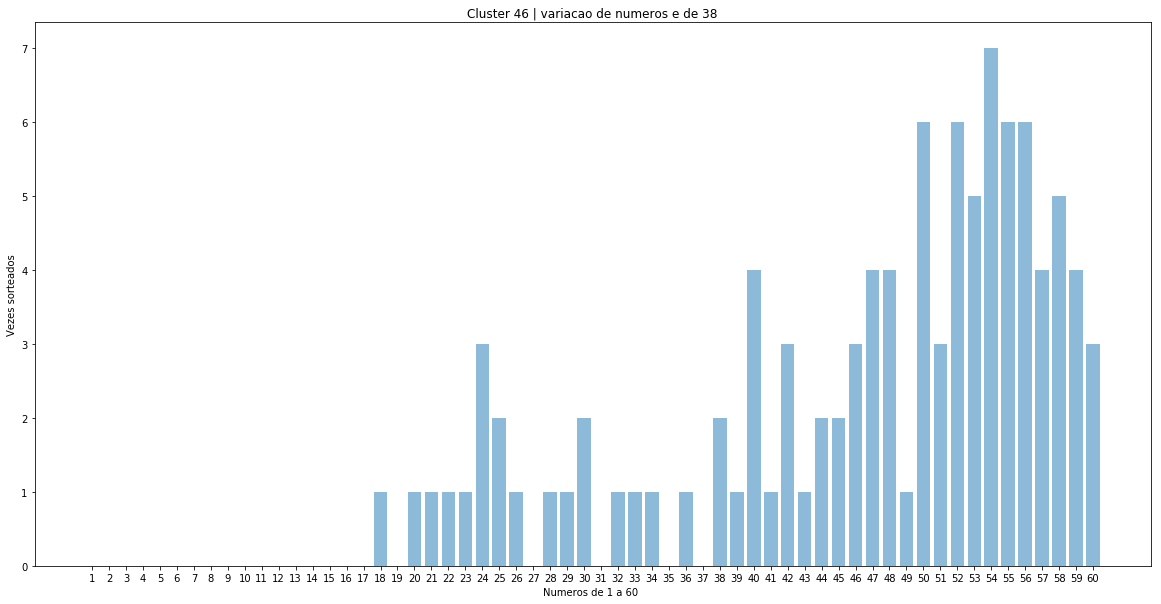

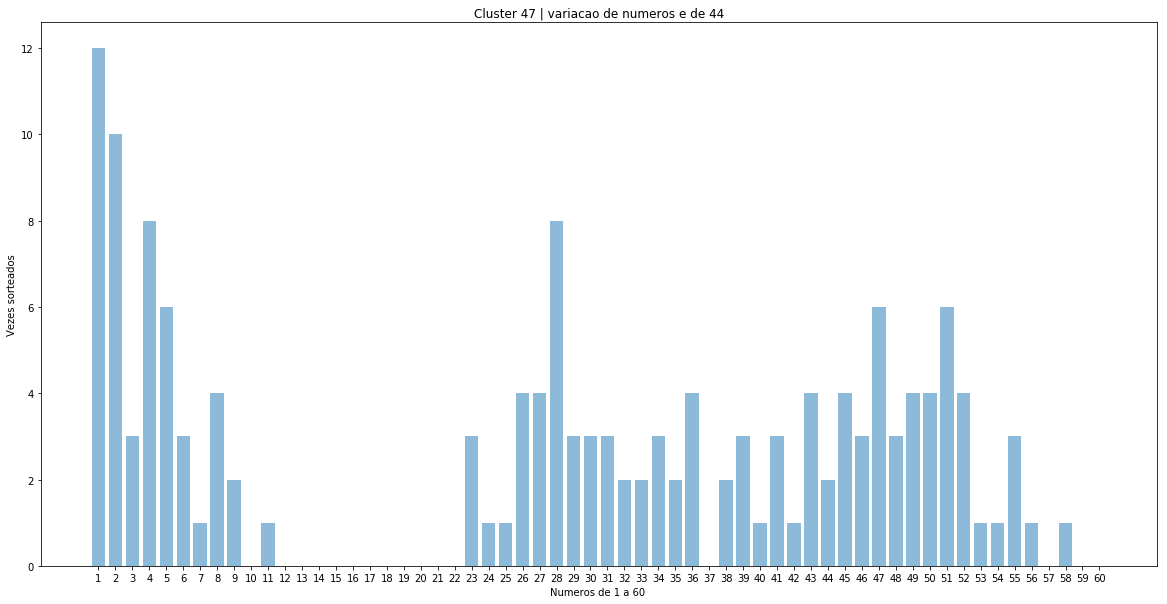

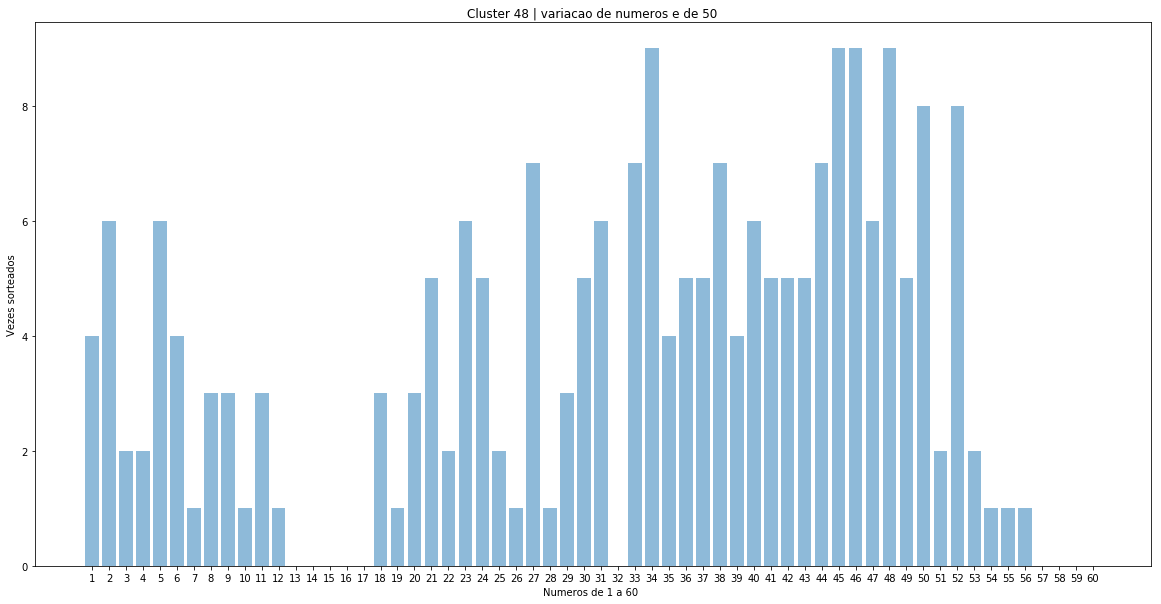

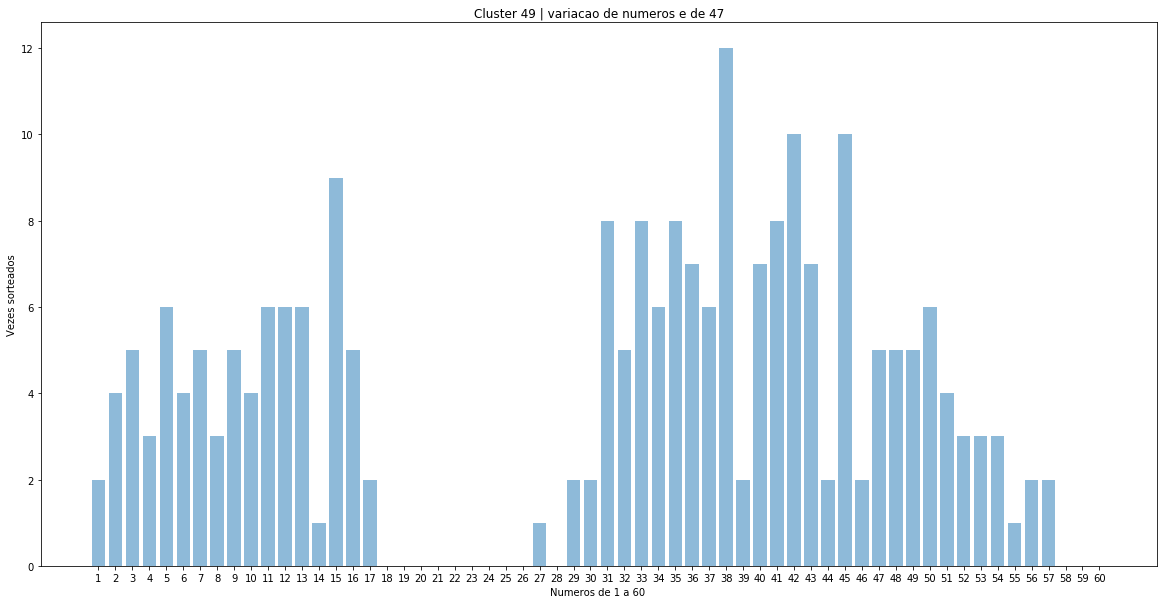

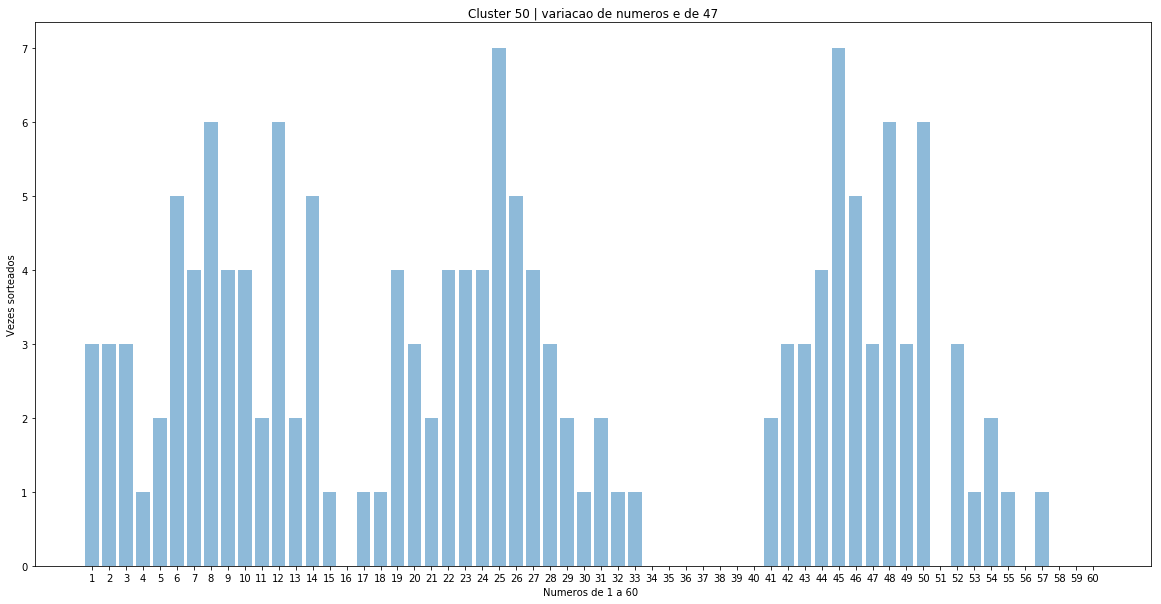

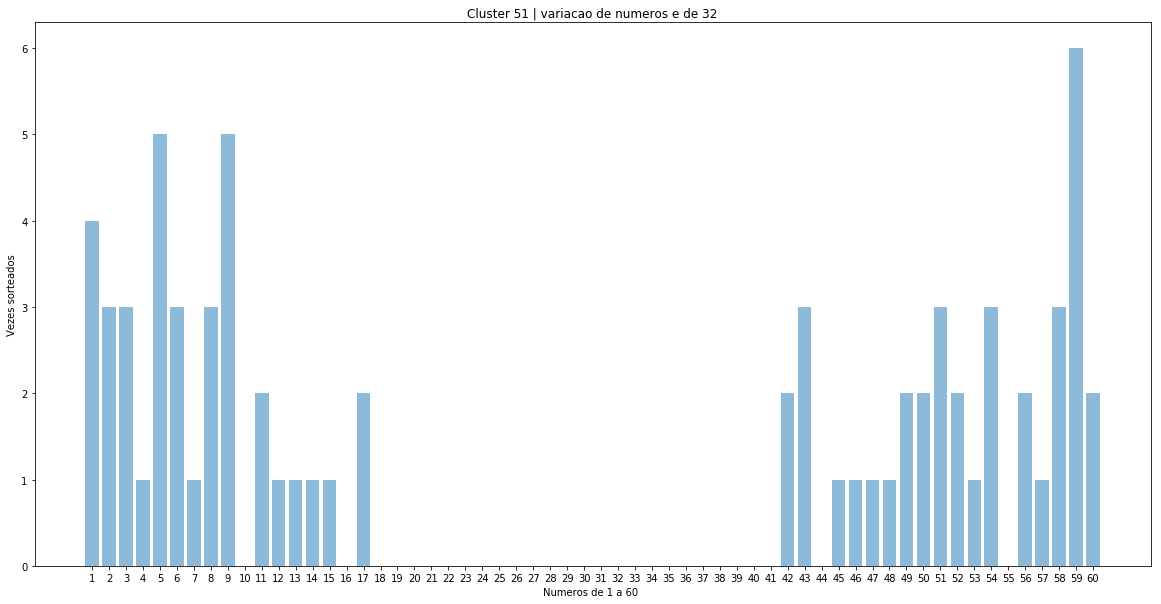

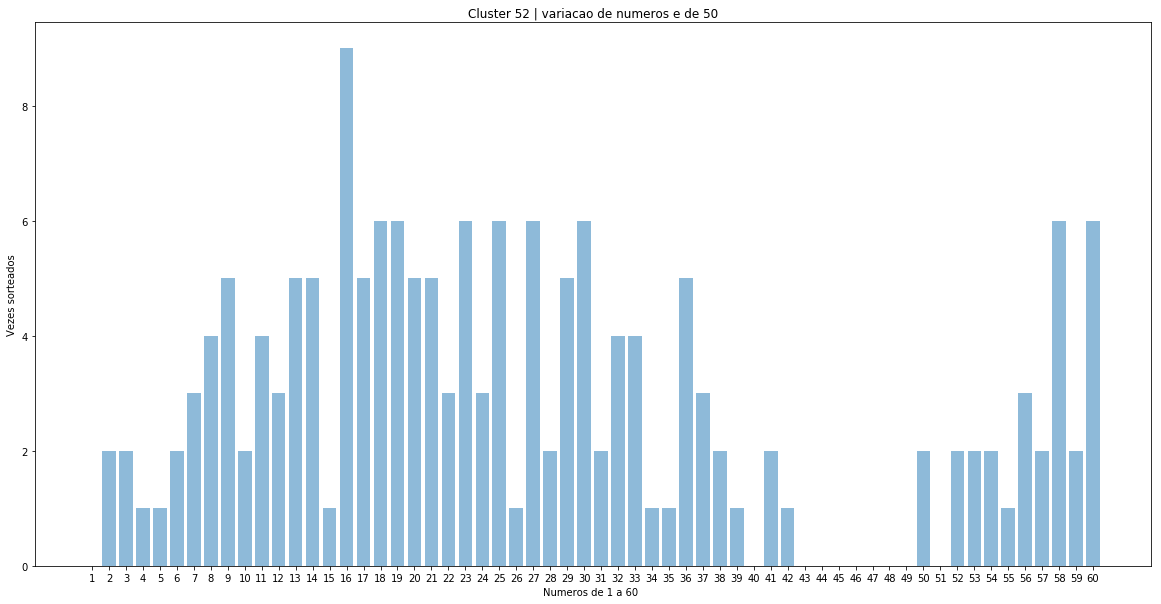

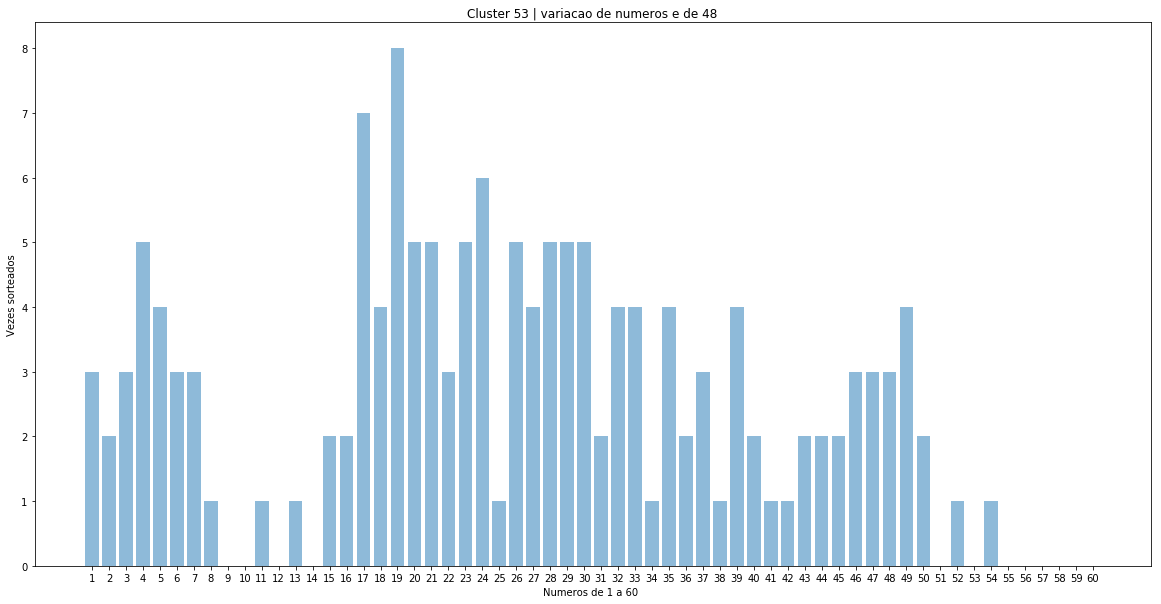

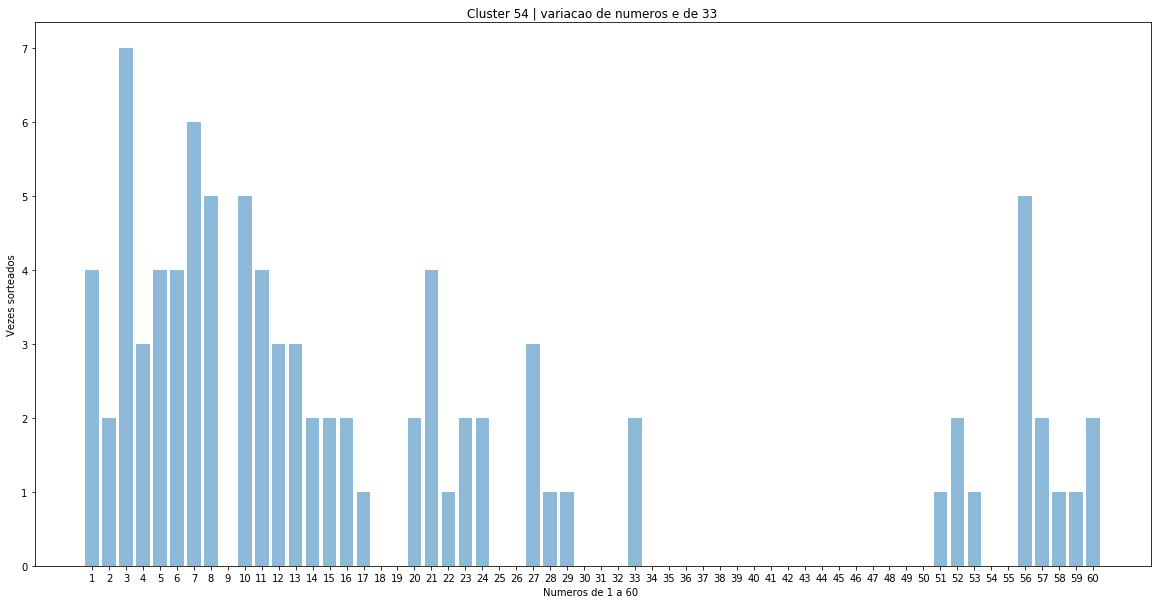

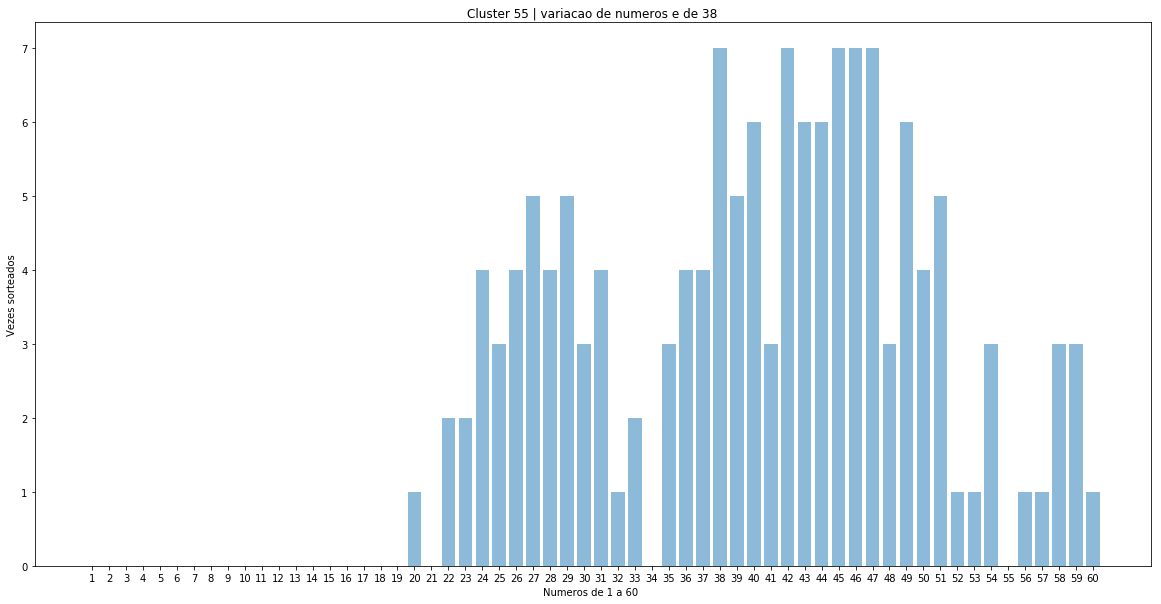

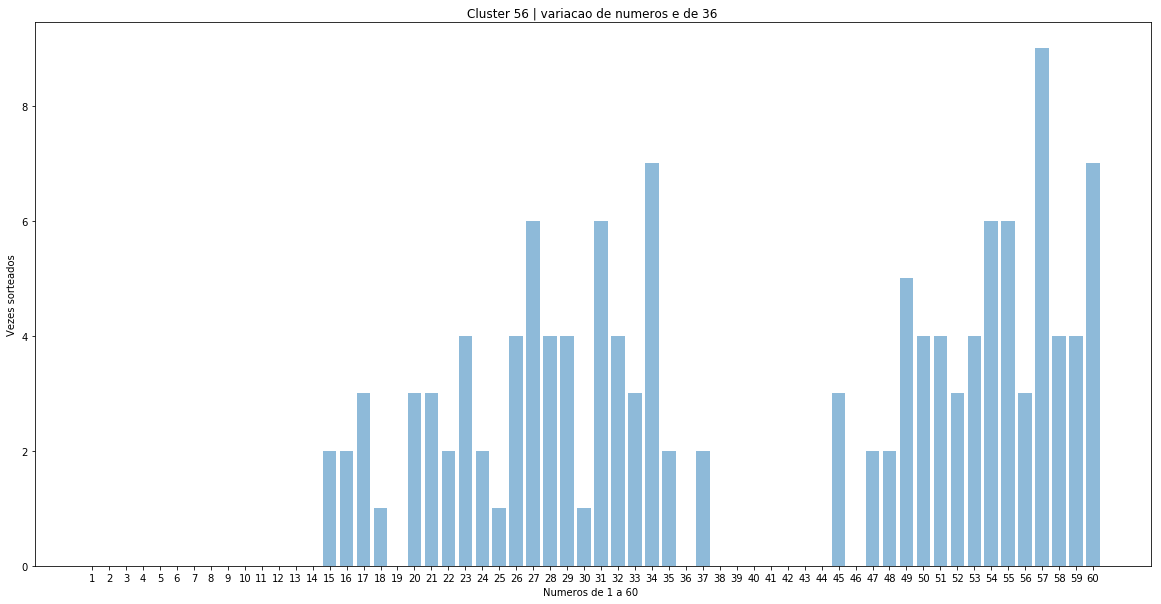

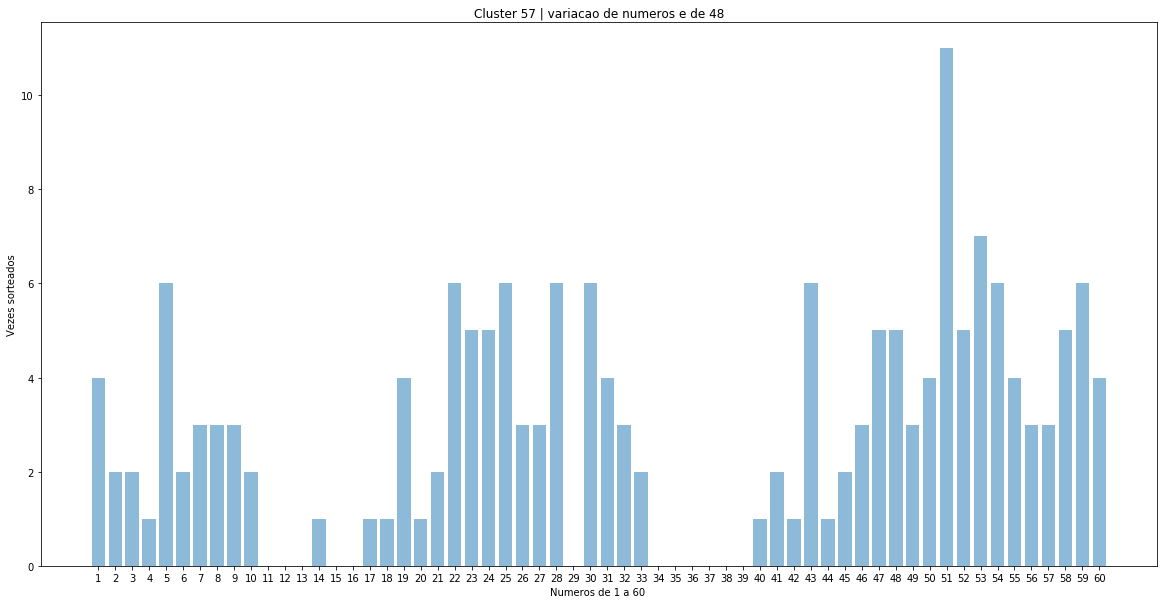

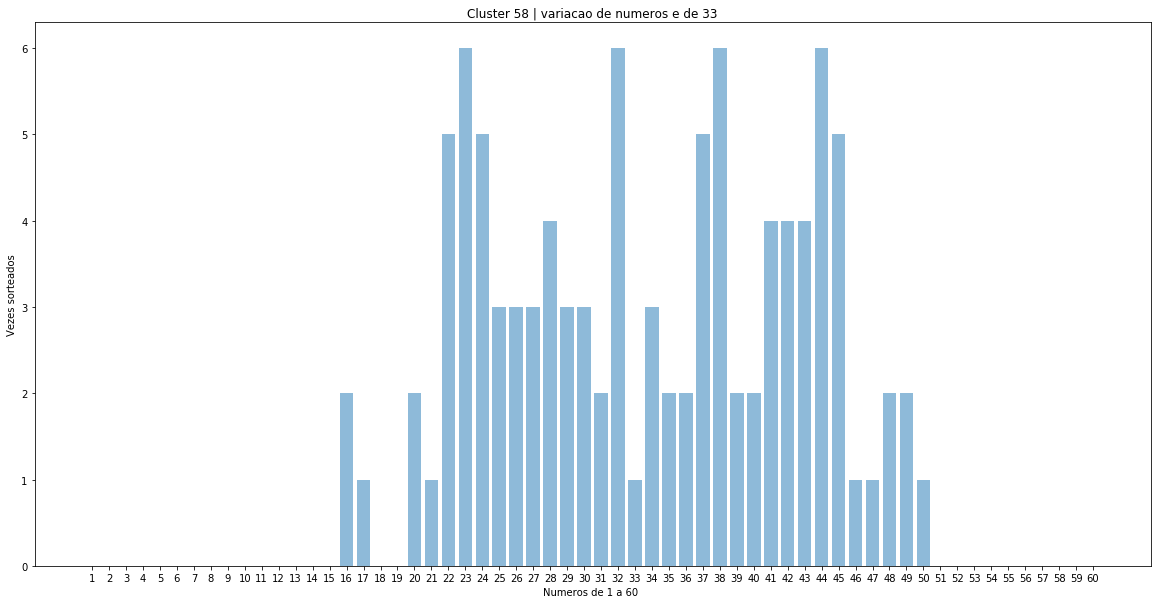

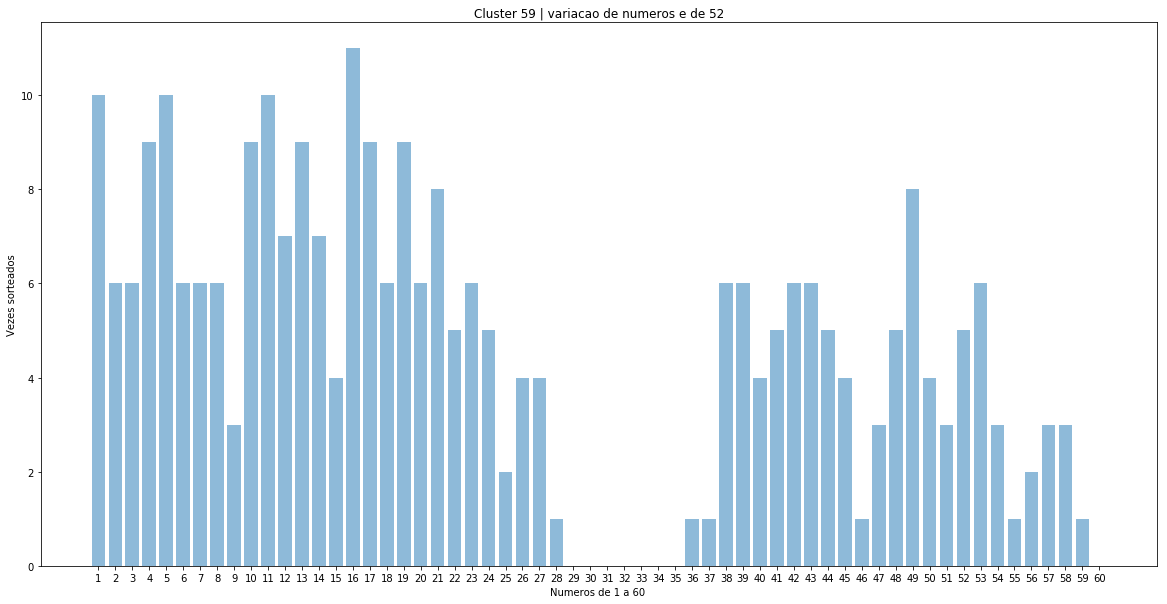

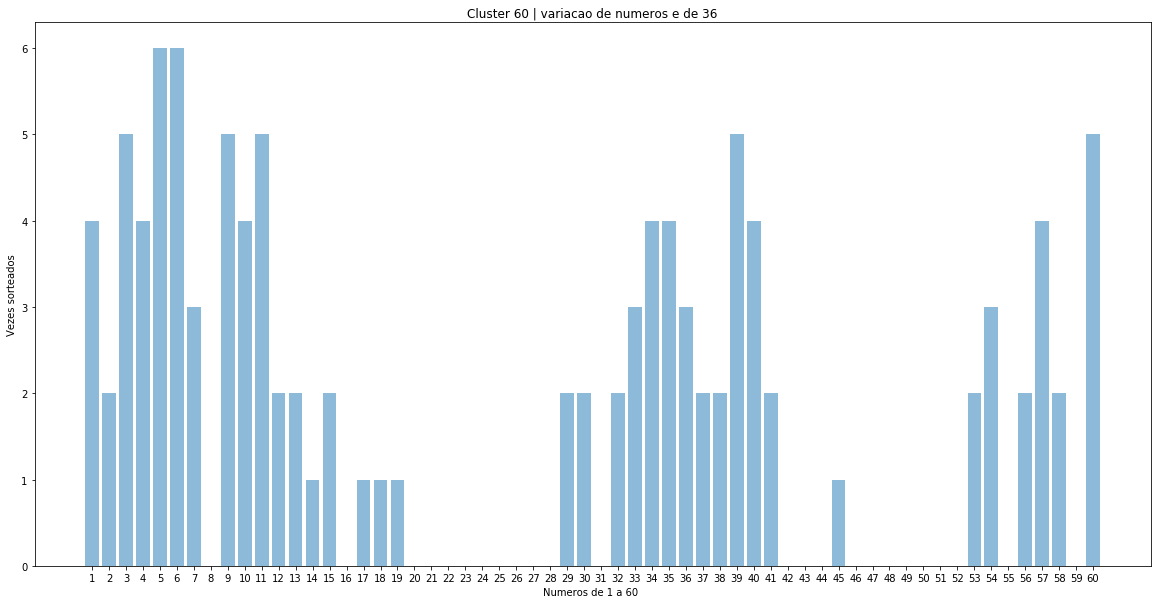

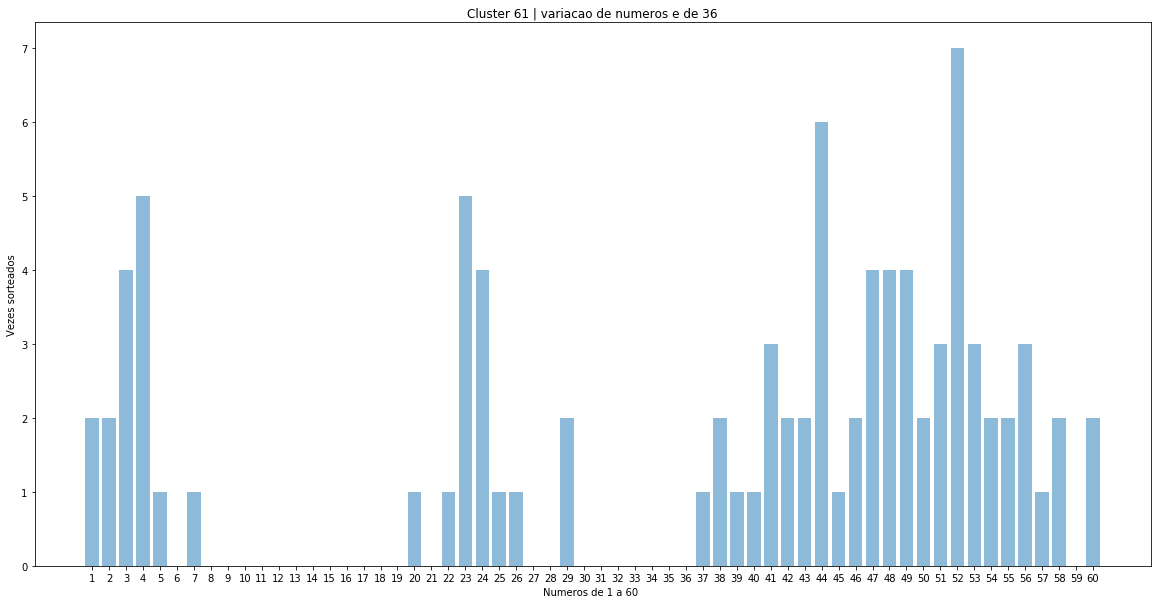

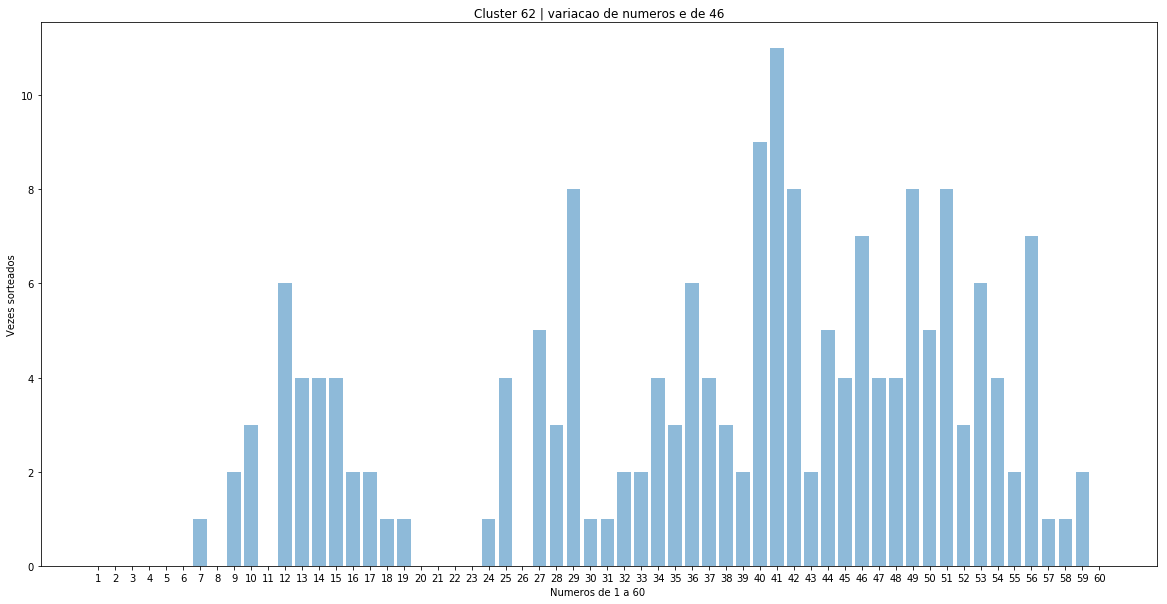

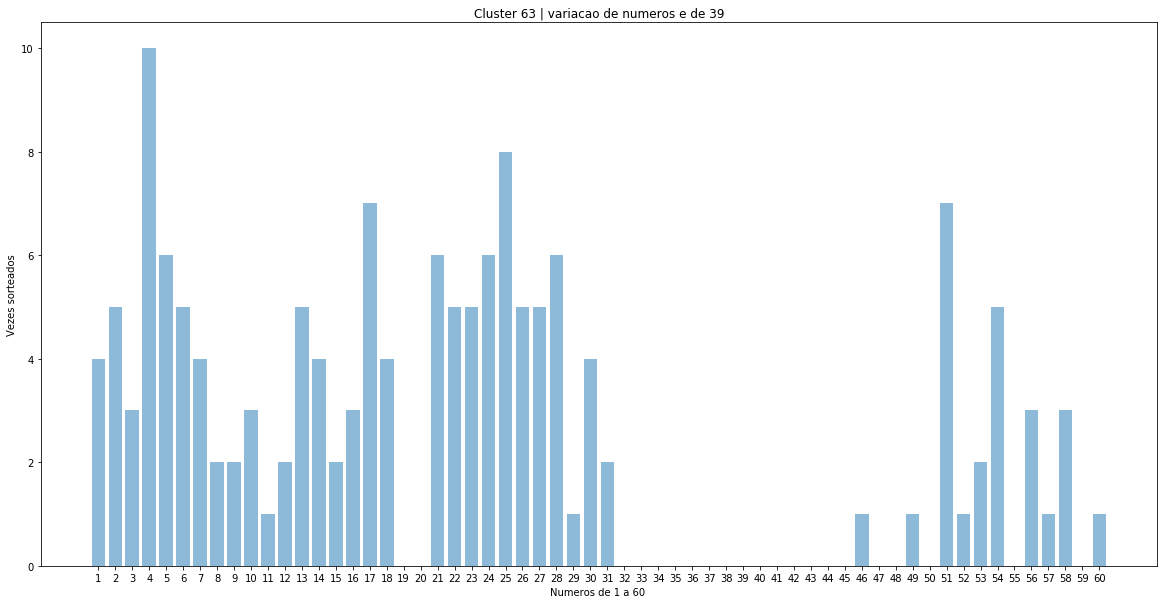

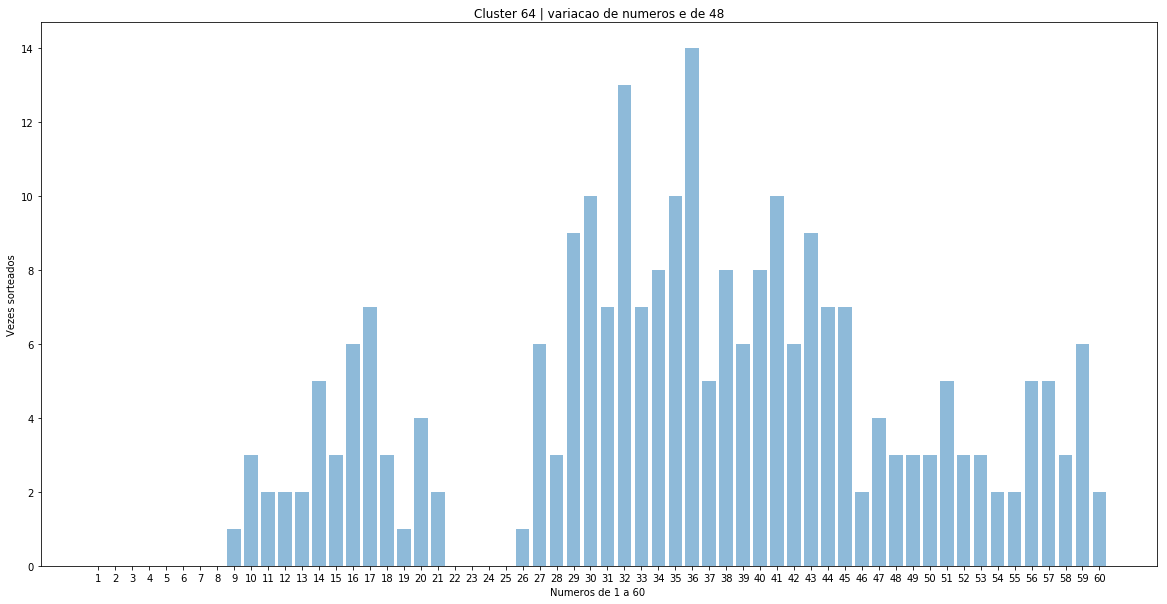

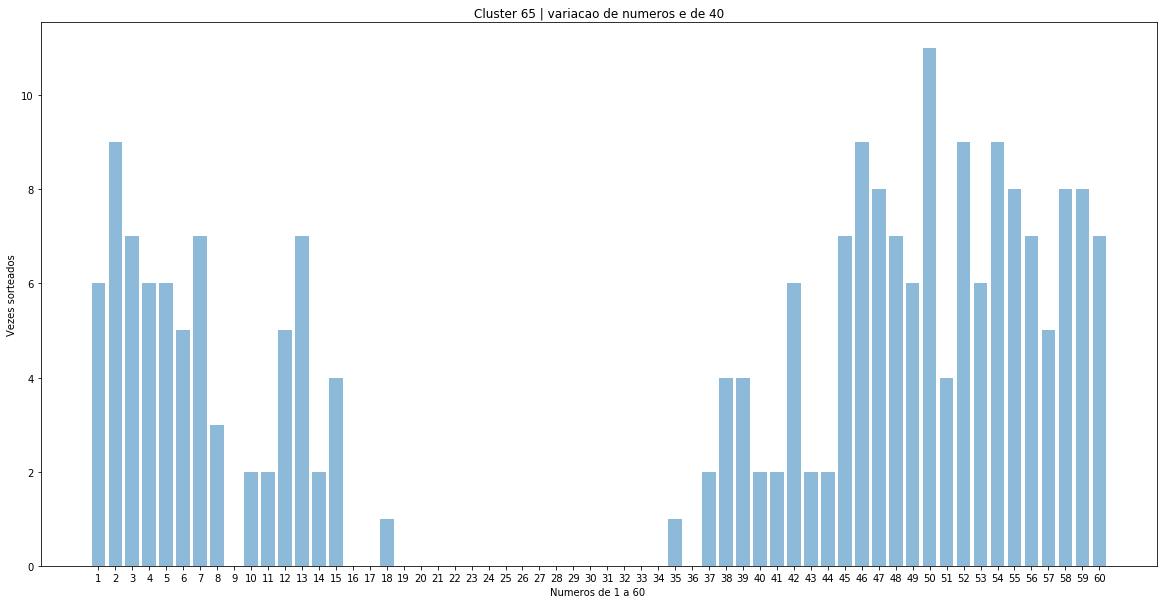

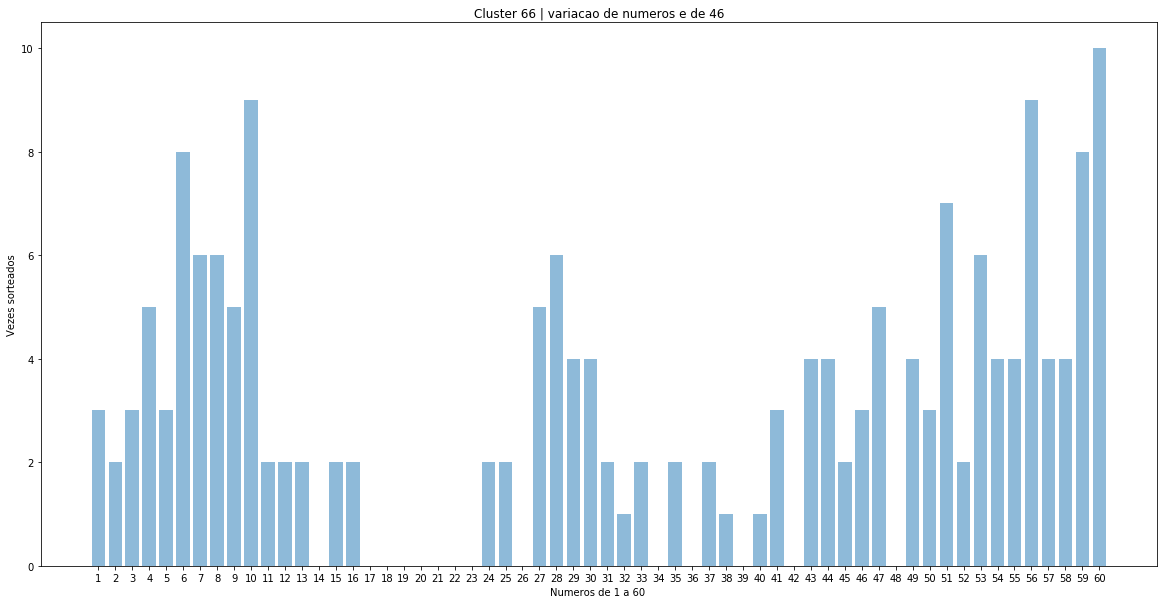

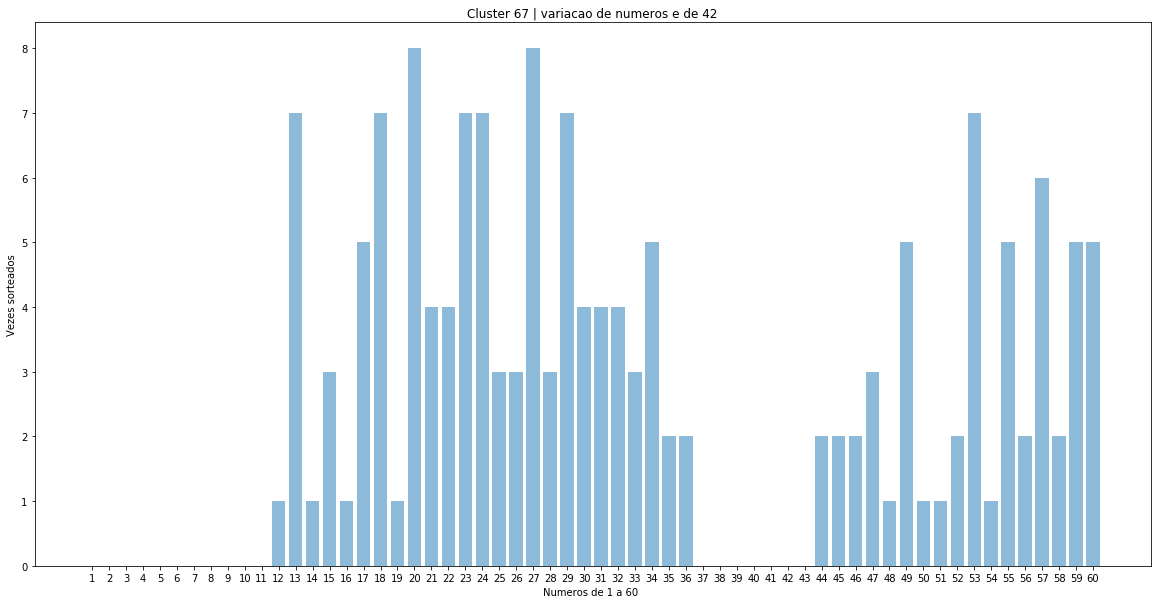

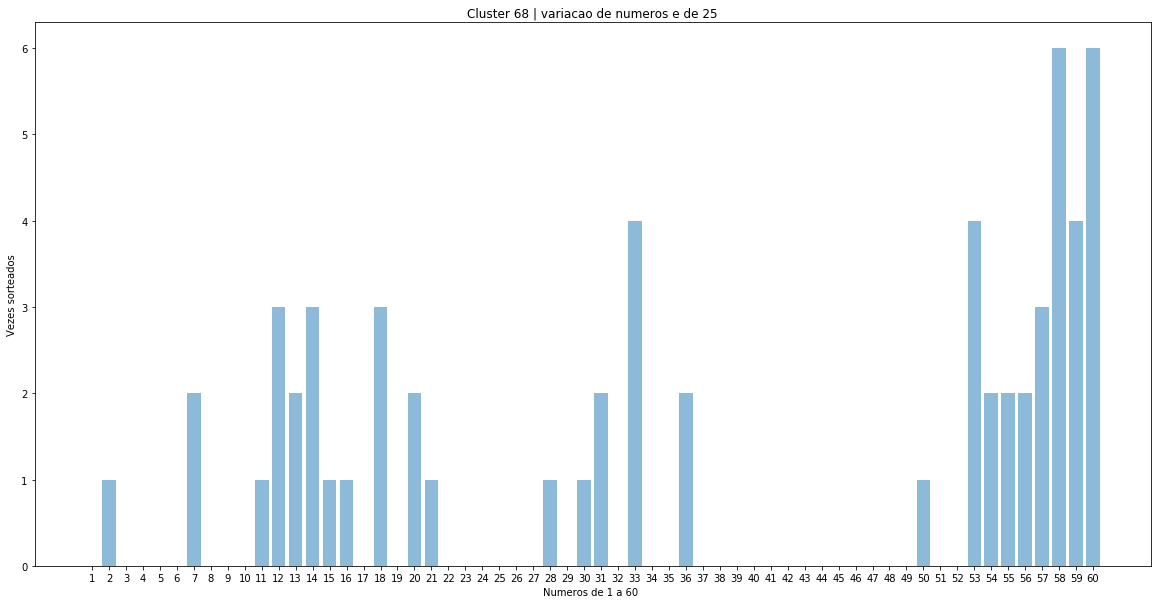

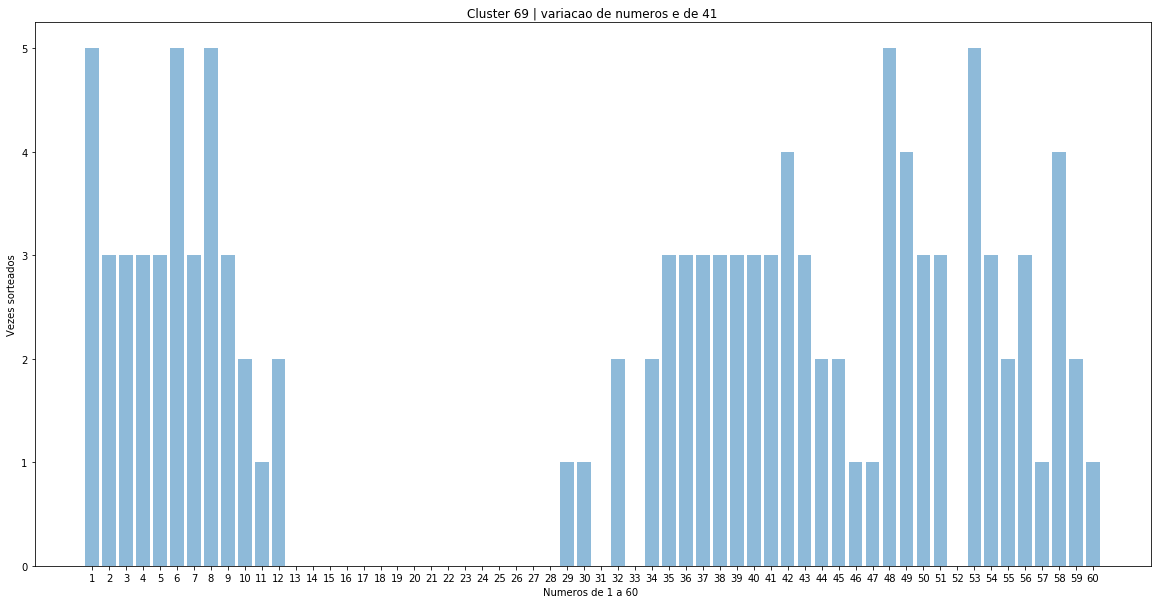

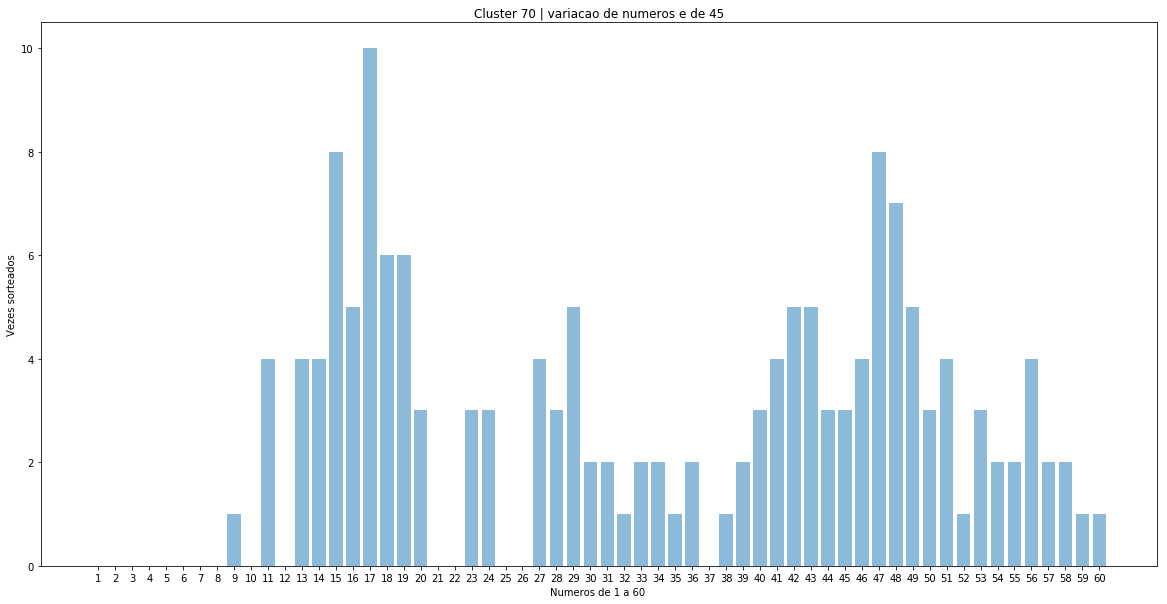

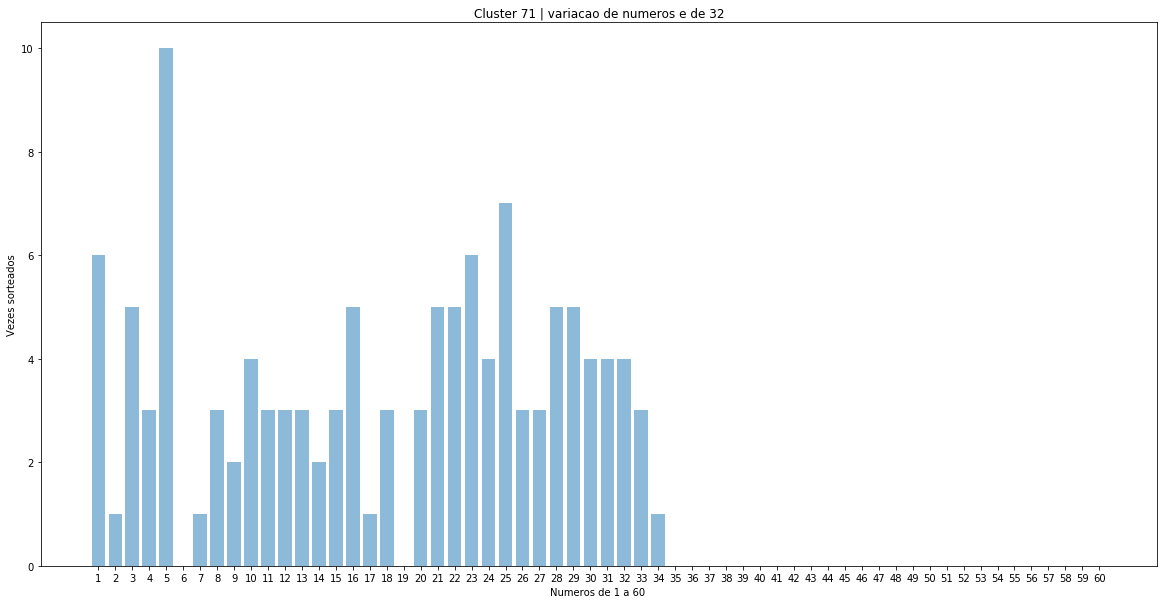

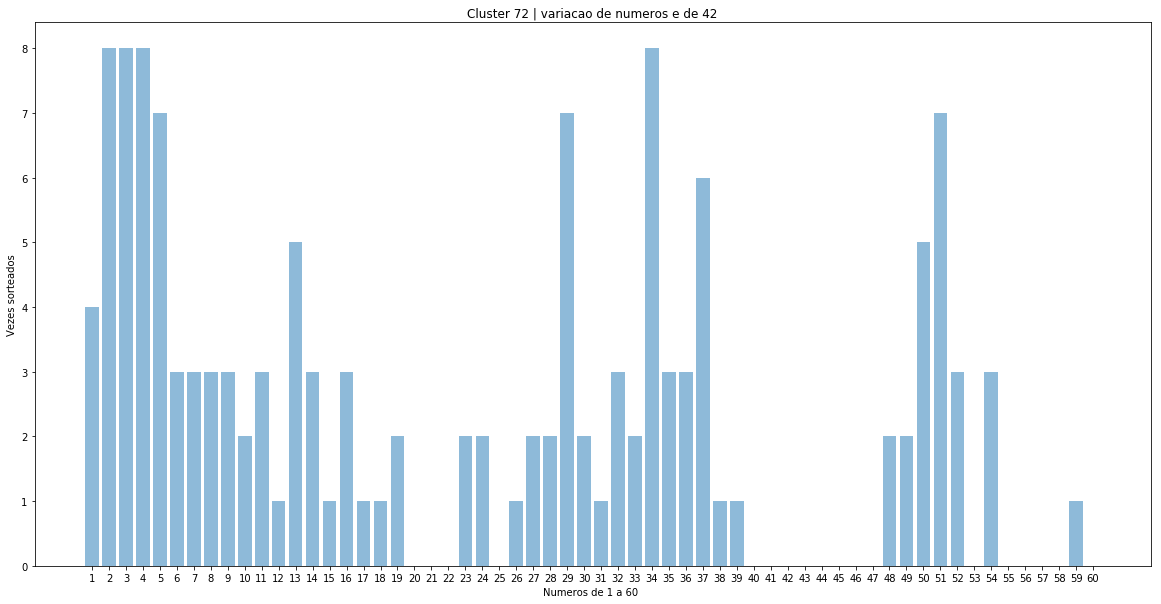

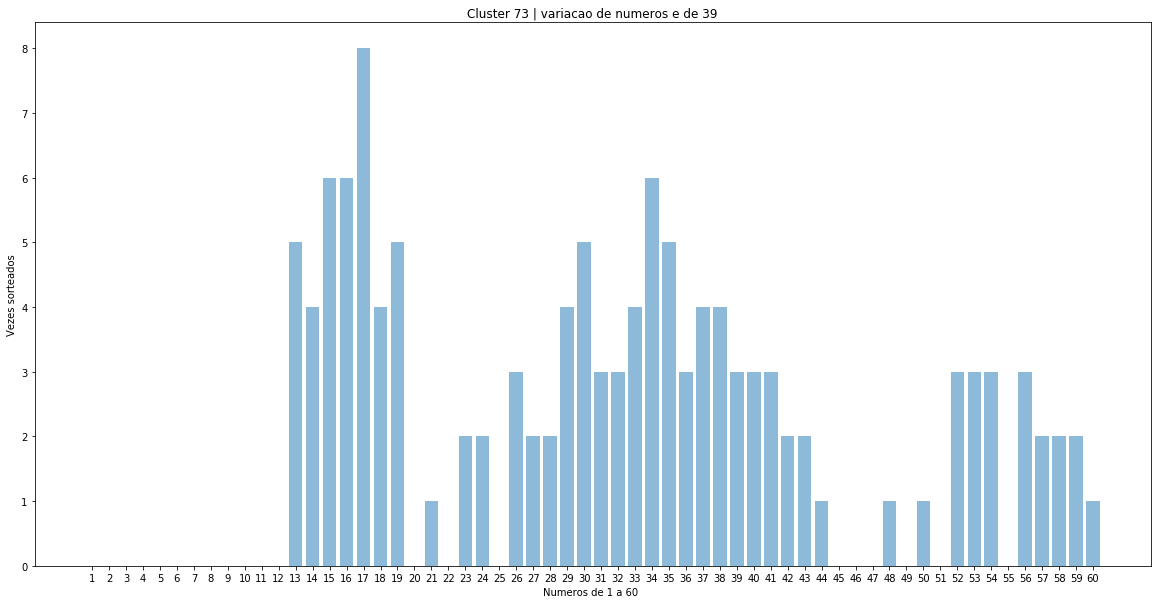

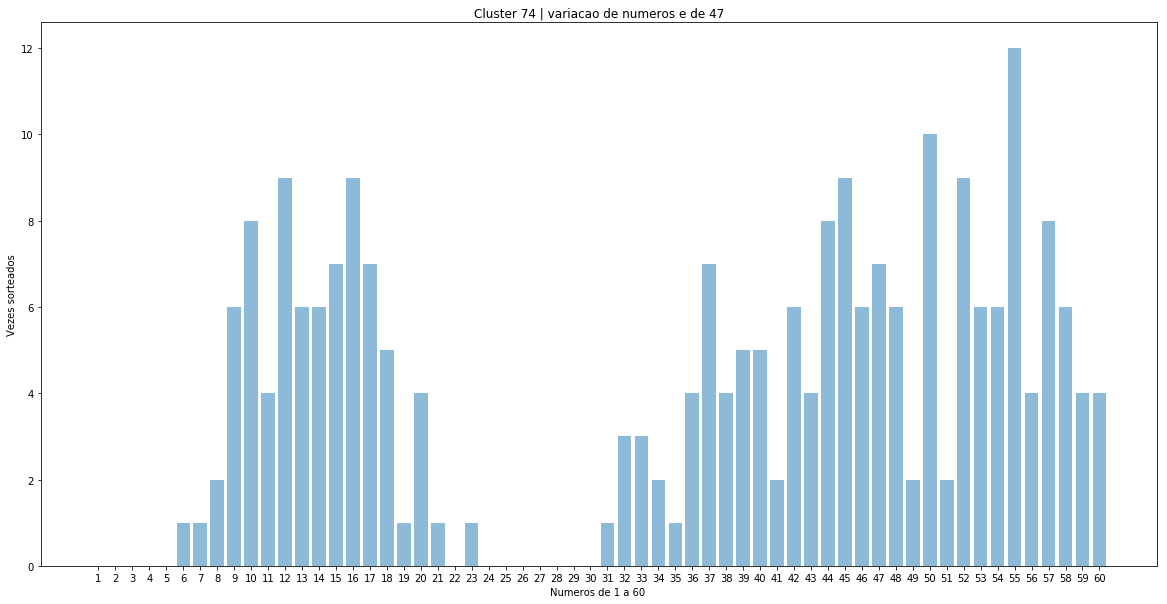

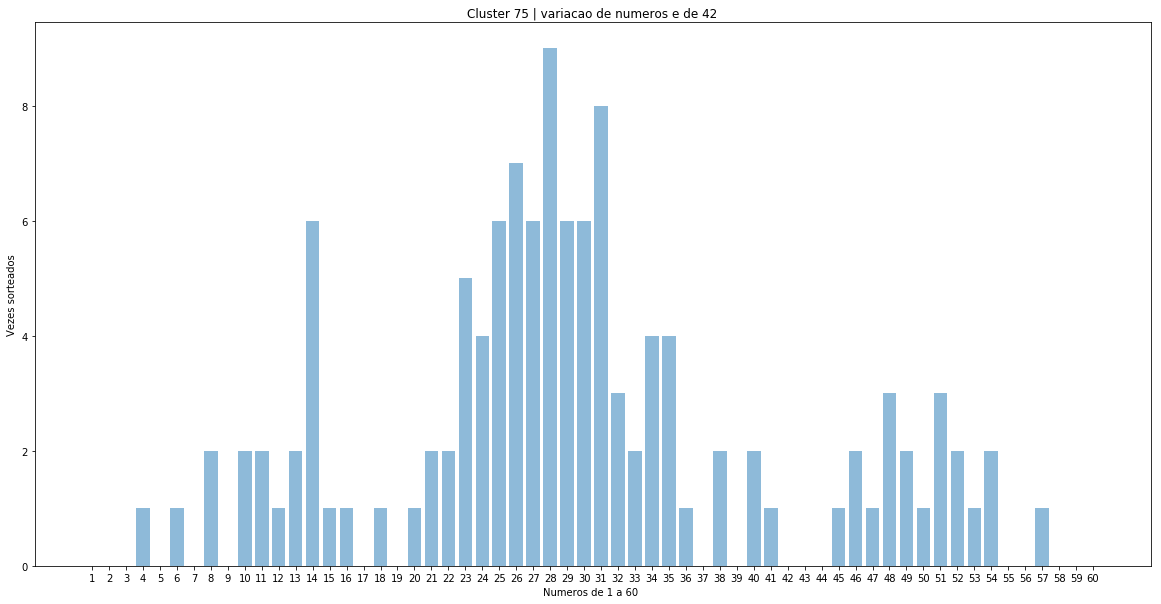

Variacao media de todos os clusters 1


In [21]:
def count_occurrence_and_plot(clusters): 
    cluster_variability_total = 0
    for cluster in clusters:    
        
        temp = get_number_dict()
        
        numbers_as_array = clusters[cluster]
        for numbers in numbers_as_array: 
            for number in numbers.split(' '): 
                temp[int(number)] += 1
        
        cluster_variability = 0; 
        
        for key_number in temp: 
            if temp[key_number] > 0: 
                cluster_variability += 1
        
        plot_histogram(temp, "Cluster " + str(cluster) + " | variacao de numeros e de "+ \
                       str(cluster_variability))
        cluster_variability_total += cluster_variability
    print("Variacao media de todos os clusters "+ str( cluster_variability_total / len(labels)))
    
count_occurrence_and_plot(cluster_fingerprint)

In [22]:
# Dando semântica aos clusters: 
def extract_meaning_from_clusters(clusters): 
    dirty_data = []
    for line in normalized_data: 
        dirty_data.append(split_data(line))
    
    for cluster in clusters: 
        #retirar zeros a direita: 
        dates_clusters = []
        for data in dirty_data: 
            numbers = data[1].strip().split(' ')
            numbers = map(int, numbers)
            numbers_string = " ".join(map(str,numbers))
            
            for numbers in clusters[cluster]: 
                if numbers_string in numbers: 
                    dates_clusters.append(data[0])
        print('------Cluster '+str(cluster)+'------')
        
        for date in dates_clusters:
            print(date)
            
        print('---------------------\n')
        
extract_meaning_from_clusters(cluster_fingerprint)

------Cluster 0------
07/06/2006
25/11/2000
27/12/2003
17/01/2004
30/03/2011
24/03/2007
18/04/2015
21/09/2013
15/05/2013
11/05/2013
05/09/2015
09/08/2011
28/01/2015
13/10/2016
20/11/2004
19/01/2008
25/07/2007
28/09/2013
01/10/2005
08/03/2006
21/04/2004
23/09/2009
08/10/2008
06/12/2014
19/08/2000
15/05/1999
24/04/2010
27/04/2013
---------------------

------Cluster 1------
20/01/2010
30/03/2002
31/10/2012
13/11/2002
19/06/1999
07/07/2012
08/04/2000
28/07/2004
17/08/2013
31/05/2006
16/04/2014
27/10/2001
18/06/2016
04/03/2015
25/03/1996
07/08/2010
26/11/2003
19/11/2005
12/01/2013
04/04/2009
---------------------

------Cluster 2------
14/08/2010
29/05/2010
21/01/2006
20/10/2004
28/07/2001
14/09/2016
07/11/2015
11/03/2009
26/04/2008
23/04/2003
07/09/1997
24/12/1998
22/08/2001
02/02/2011
24/11/2010
30/10/2013
21/11/2015
19/09/2012
20/08/2011
27/08/2016
27/11/2002
06/04/2005
31/07/1999
29/07/2009
03/12/2003
12/07/2008
31/03/2007
27/07/2011
07/02/2004
22/12/1996
10/11/2010
08/08/2007
--------